## Problem Description:

Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market





## Problem Statement:

Car manufactures company need to understand how price is impacting on various model on car.
They wanted to calculate the price based on above  manipulate the design of the cars, the business strategy etc. to meet certain price.

## Business Goal:

We are required to model the price of cars with the available independent variables. 
It will be used by the management to understand how exactly the prices vary with the independent variables. 
They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

We want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car.
2. How well those variables describe the price of a car.



In [3475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder



In [3476]:
# Reading data

df = pd.read_csv(r'C:\Users\Rajesh\Desktop\main\Rajesh\Data Science\car_assessment\CarPrice_Assignment.csv')
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Observation.

1. Some car name had typo and duplicate so we need to correct it.
2. Some column are order category so we need to use label encoder and then scale.
3. some column are not as order category so we need to use dummies (One-Hot encoding)
4. Some column datatype need to changes too.
5. Need to check outlier and missing values.
6. Looke like we should have variance across columns too if they have any releationship.

In [3477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Data columns :total 26 columns
1. At this moment not sure if i have to do for derived columns
2. Looks like most of the column are not null so hopefully columns does not have NAN but will have to check.
3. At this moment all columns have good datatype but need to check once correlataion started.

In [3478]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Observation :

1. Looks at the max and 50%, for some of columns 50% is not good as per his correspodning max like for carheight,boreratio etc..
2. Mean is looks good for all columns apart from few which we need to check for correlation.
3. 25% and 75% also looks good. So some columns data have been spread out and some columns we might have good linear relationship.


In [3479]:
# Checking NAN if we have for any column and row.

df.isna().sum(axis = 0)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## There is no NAN in both the axis

In [3480]:
df.isnull().sum(axis = 0)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Important points we need to consider while modeling.

1. First Read understand and visualising the data with graphs.
2. Prepar data for modeling (train-test split, rescaling etc..)
3. Use label and dummies encoding as approciate.
4. Traing the model.
5. Residual analysis.
6. Predictions and evaluation of the test set.

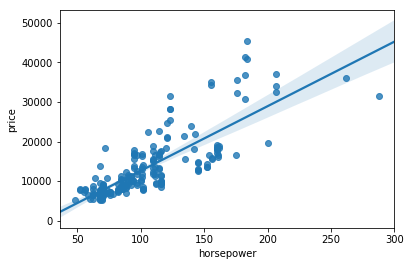

In [3481]:
# Visualising numeric data for one variable how it looks like.

sns.regplot(x='horsepower',y='price',data=df)

As i said some of the variable as good correlation with dependent variable.
If just ploting one graph, which is price va horsepower, looks like both are good significant to each other.
Looks like straight line and best fitted and data point spread more towards to x axis.

In [3482]:
#Split Carname and taking first part from CarName and adding a new columns called Car_Name and we an remove CarName after.

df["Car_Name"]= df["CarName"].str.split(" ").str[0]
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Observation from  column.
1. Few car names are typo so need to rename.
2. Few Car bane are duplicate so need to fix.

In [3483]:
# Fixing CarName column.

df['Car_Name']= df['Car_Name'].replace('maxda', 'mazda') 
df['Car_Name']= df['Car_Name'].replace('porcshce', 'porsche') 
df['Car_Name']= df['Car_Name'].replace('toyouta', 'toyota') 
df['Car_Name']= df['Car_Name'].replace('volkswagen', 'volswagen') 


In [3484]:
#Dropping the original name

df.drop(['CarName'], axis = 1,inplace=True)
df.head()


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [3485]:
# These variable are not significant so dropping them

df.drop(['car_ID'], axis = 1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Name
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


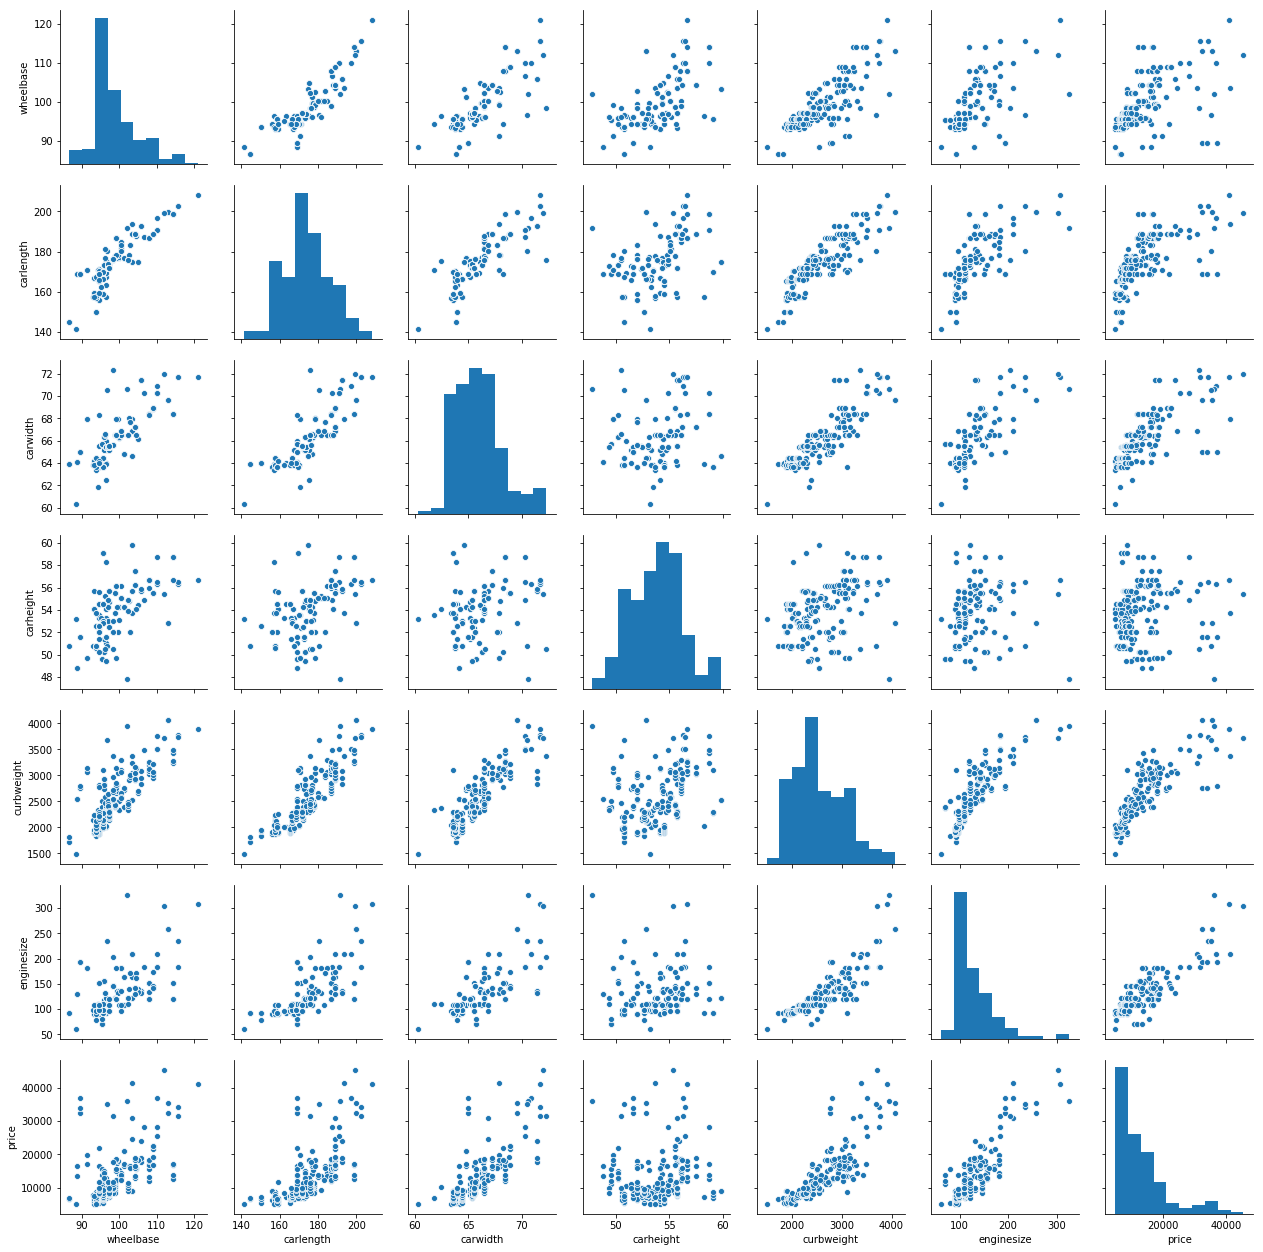

In [3486]:
# Visualising numeric variables.

sns.pairplot(df,vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','price'])
plt.show()

## Observation from above graph.
1. Some independent variable has positive correlation to each other 
    Wheelbase vs carlength, Wheelbase vs carweigth and many more 
2. Few has less negative correlation to each other
    Peakrpm vs price, citympg vs price and many more.
3. Some does not have much correlation so we proably need to remove after or VIF phase.
   stroke vs curbweight and mant more.

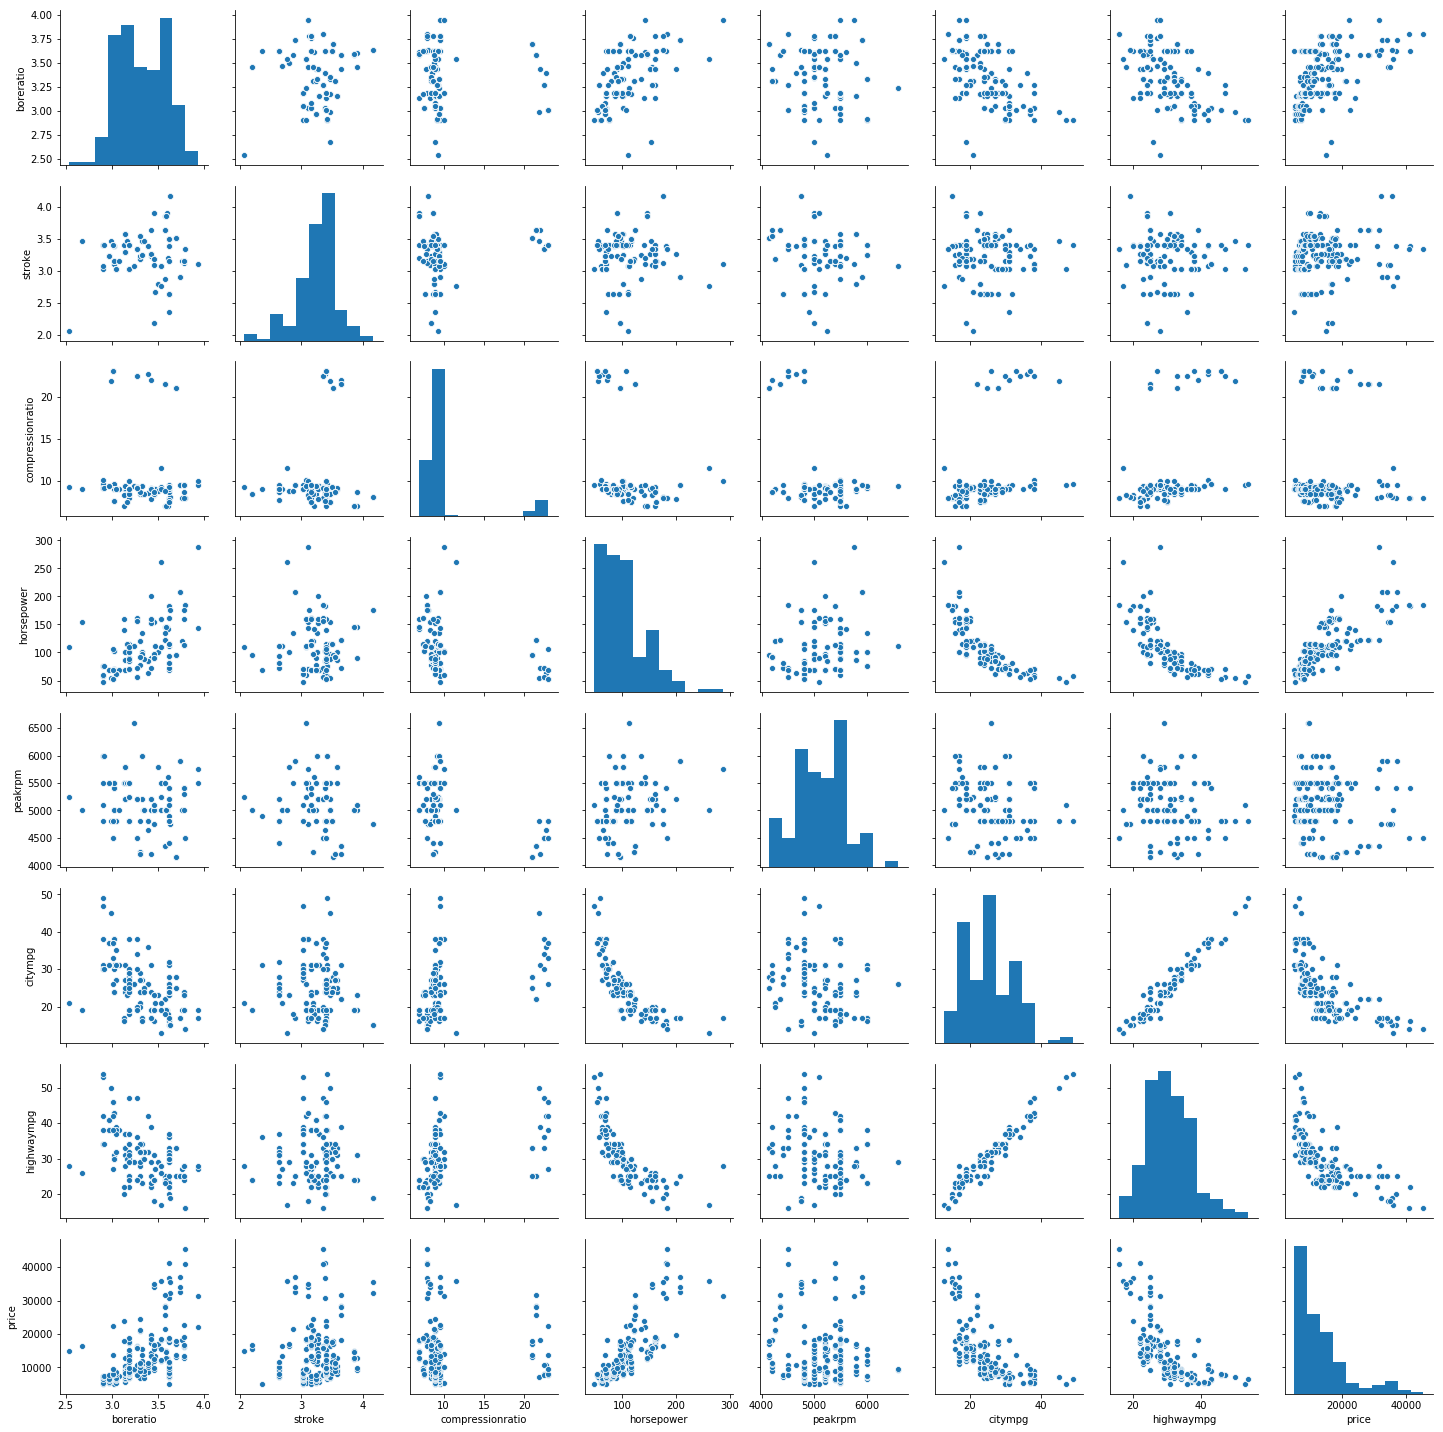

In [3487]:
# Visualising numeric variables

sns.pairplot(df,vars = ['boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price'])
plt.show()

## Interpret the above Chart.

1. Looks like price is increasing sharply when few independent variable are increasing with positive cofficient
   enginesize
   curbweight
   horsepower
   carweigh
   carlength
   wheelbase
   wheeldrive
2. few independent vaiable have negative cofficient
3. Few has no relation with X and Y.

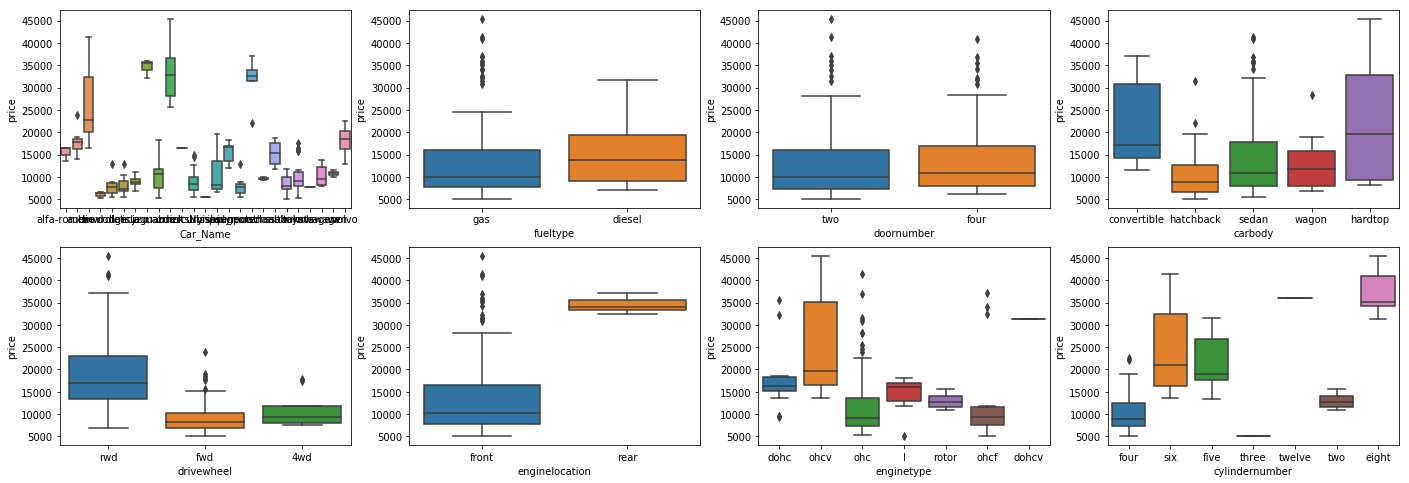

In [3488]:
# Visualising categorical variables

plt.figure(figsize=(24,8))

plt.subplot(2,4,1)
sns.boxplot(x='Car_Name',y='price',data=df)
plt.subplot(2,4,2)
sns.boxplot(x='fueltype',y='price',data=df)
plt.subplot(2,4,3)
sns.boxplot(x='doornumber',y='price',data=df)
plt.subplot(2,4,4)
sns.boxplot(x='carbody',y='price',data=df)
plt.subplot(2,4,5)
sns.boxplot(x='drivewheel',y='price',data=df)
plt.subplot(2,4,6)
sns.boxplot(x='enginelocation',y='price',data=df)
plt.subplot(2,4,7)
sns.boxplot(x='enginetype',y='price',data=df)
plt.subplot(2,4,8)
sns.boxplot(x='cylindernumber',y='price',data=df)


## Interpect the above Chart

1. Little bit More preference on fuel as diesel but its mediam does not differ much.
2. There is no correlation with no. of doors
3. There is good correlation and more preference with carbody as hardtop and convertable which is preading on top.
4. Drivewheel fwd selection has more preference with price
5. There is a high price where enginelocation is on front
6. Price is increasing for enginetype as ohcv
7. Cost is more for 6 and 8 cylinder.

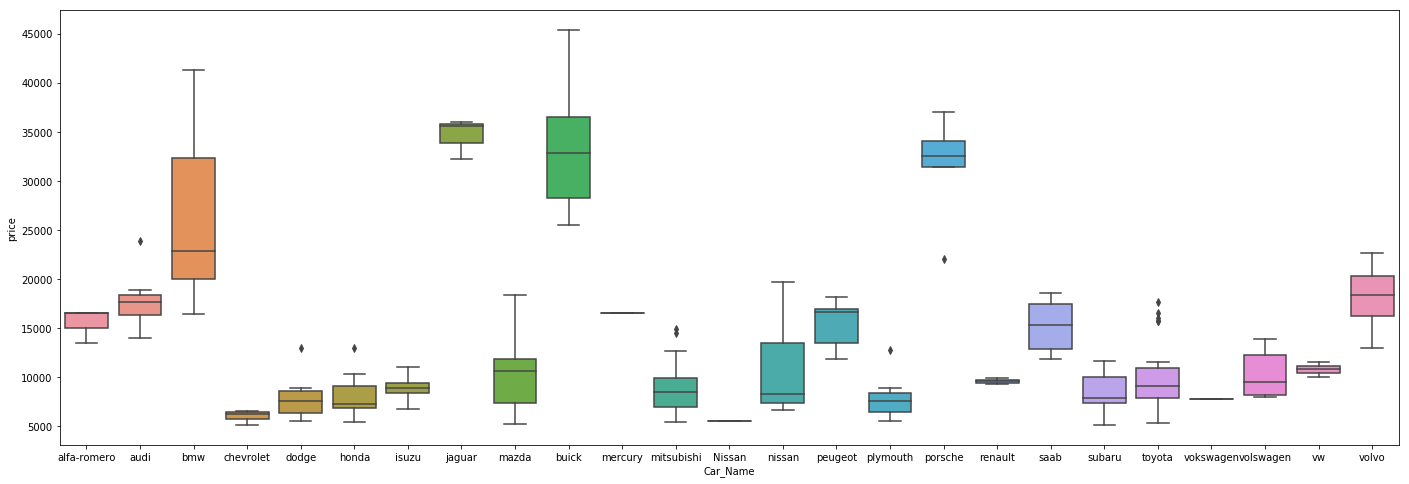

In [3489]:
plt.figure(figsize=(24,8))
sns.boxplot(x='Car_Name',y='price', data=df)

## Data Preparation with Encoding rule.

1. Label Encoding : If data is order in any columns.
2. Hot-Encoding(dummies) : if data is non-order in any columns.    

In [3490]:
# Applying some encoding rule  for caterigorical variable.
# Applying encoding for order categorial variable.

le = LabelEncoder()

df['doornumber'] = le.fit_transform(df['doornumber'])
df['drivewheel'] = le.fit_transform(df['drivewheel'])
df['enginelocation'] = le.fit_transform(df['enginelocation'])
df['cylindernumber'] = le.fit_transform(df['cylindernumber'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['fueltype'] = le.fit_transform(df['fueltype'])
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Name
0,3,1,0,1,convertible,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,0,1,convertible,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,0,1,hatchback,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,0,0,sedan,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,0,0,sedan,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [3491]:
# Applying encoding for non-order categorial variable.

carbody_status = pd.get_dummies(df['carbody'])
carbody_status.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [3492]:
# Dropping redudant dummay variable
carbody_status = pd.get_dummies(df['carbody'],drop_first = True)
carbody_status.head()


,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [3493]:
# Cancating to original dataframe.

df = pd.concat([df,carbody_status],axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,horsepower,peakrpm,citympg,highwaympg,price,Car_Name,hardtop,hatchback,sedan,wagon
0,3,1,0,1,convertible,2,0,88.6,168.8,64.1,...,111,5000,21,27,13495.0,alfa-romero,0,0,0,0
1,3,1,0,1,convertible,2,0,88.6,168.8,64.1,...,111,5000,21,27,16500.0,alfa-romero,0,0,0,0
2,1,1,0,1,hatchback,2,0,94.5,171.2,65.5,...,154,5000,19,26,16500.0,alfa-romero,0,1,0,0
3,2,1,0,0,sedan,1,0,99.8,176.6,66.2,...,102,5500,24,30,13950.0,audi,0,0,1,0
4,2,1,0,0,sedan,0,0,99.4,176.6,66.4,...,115,5500,18,22,17450.0,audi,0,0,1,0


In [3494]:
# Dropping carbody after creating dummy variable

df.drop(['carbody'], axis = 1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,horsepower,peakrpm,citympg,highwaympg,price,Car_Name,hardtop,hatchback,sedan,wagon
0,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,111,5000,21,27,13495.0,alfa-romero,0,0,0,0
1,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,111,5000,21,27,16500.0,alfa-romero,0,0,0,0
2,1,1,0,1,2,0,94.5,171.2,65.5,52.4,...,154,5000,19,26,16500.0,alfa-romero,0,1,0,0
3,2,1,0,0,1,0,99.8,176.6,66.2,54.3,...,102,5500,24,30,13950.0,audi,0,0,1,0
4,2,1,0,0,0,0,99.4,176.6,66.4,54.3,...,115,5500,18,22,17450.0,audi,0,0,1,0


In [3495]:
# Applying encoding for non-order categorial variable.

enginetype_status = pd.get_dummies(df['enginetype'])
enginetype_status.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [3496]:
# Dropping redudant dummay variable
enginetype_status = pd.get_dummies(df['enginetype'],drop_first = True)
enginetype_status.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [3497]:
# Cancating to original dataframe.

df = pd.concat([df,enginetype_status],axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,hardtop,hatchback,sedan,wagon,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,2,0,94.5,171.2,65.5,52.4,...,0,1,0,0,0,0,0,0,1,0
3,2,1,0,0,1,0,99.8,176.6,66.2,54.3,...,0,0,1,0,0,0,1,0,0,0
4,2,1,0,0,0,0,99.4,176.6,66.4,54.3,...,0,0,1,0,0,0,1,0,0,0


In [3498]:
# Dropping enginetype after creating dummy variable

df.drop(['enginetype'], axis = 1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,hardtop,hatchback,sedan,wagon,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,2,0,94.5,171.2,65.5,52.4,...,0,1,0,0,0,0,0,0,1,0
3,2,1,0,0,1,0,99.8,176.6,66.2,54.3,...,0,0,1,0,0,0,1,0,0,0
4,2,1,0,0,0,0,99.4,176.6,66.4,54.3,...,0,0,1,0,0,0,1,0,0,0


<function matplotlib.pyplot.show(*args, **kw)>

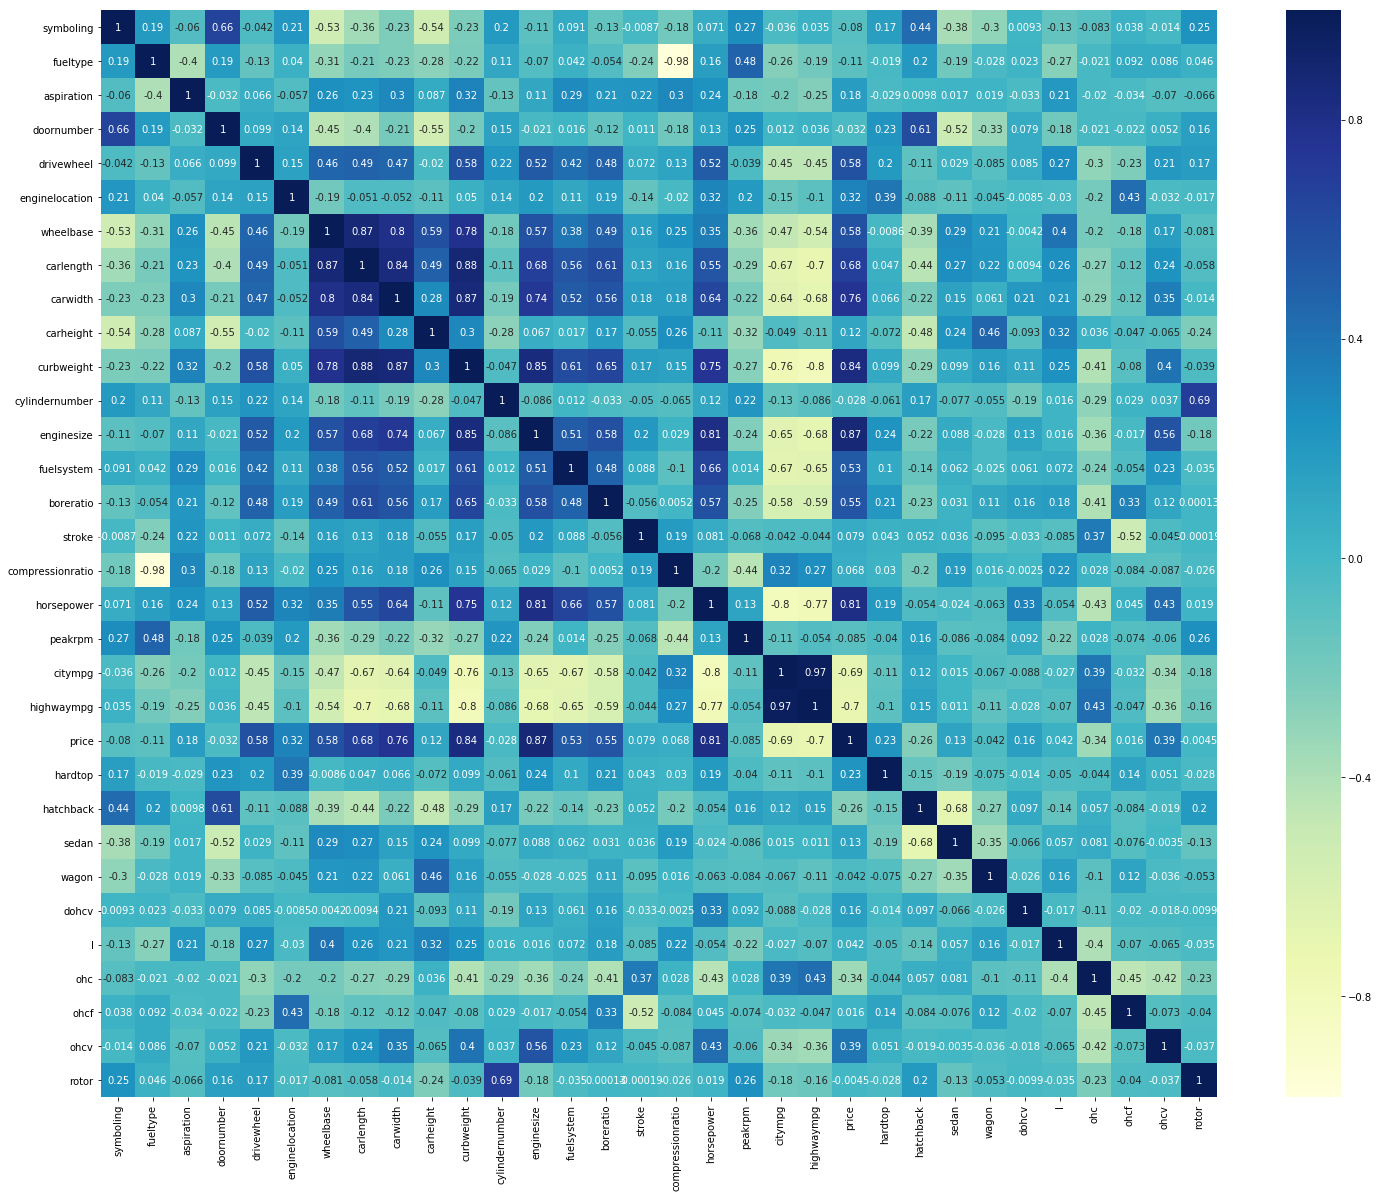

In [3499]:
# Finding correlation

plt.figure(figsize = (25,20))
sns.heatmap(df.corr(),annot = True, cmap = 'YlGnBu')
plt.show

## Interpect the above Chart

1. There is a positive correlation between price and below variable which are on top
   enginesize
   curbweight
   horsepower
   carweight
   carlength
   wheelbase
   wheeldrive
2. There are some independent varable which are negetive correlation with price
3. Some are still constane and does not change with price.

In [3500]:
df['Car_Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'vokswagen', 'volswagen', 'vw',
       'volvo'], dtype=object)

In [3501]:
# Creating dummay variable for Car_Name

status = pd.get_dummies(df['Car_Name'])
status.head()

,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3502]:
# Dropping redudant dummay variable
status = pd.get_dummies(df['Car_Name'],drop_first = True)
status.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3503]:
# concat the dummay data with origonal one

df = pd.concat([df,status],axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
0,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,2,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,1,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,0,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [3504]:
# Dropping Car_Name after creating dummy variable

df.drop(['Car_Name'], axis = 1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
0,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,2,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,1,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,0,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(*args, **kw)>

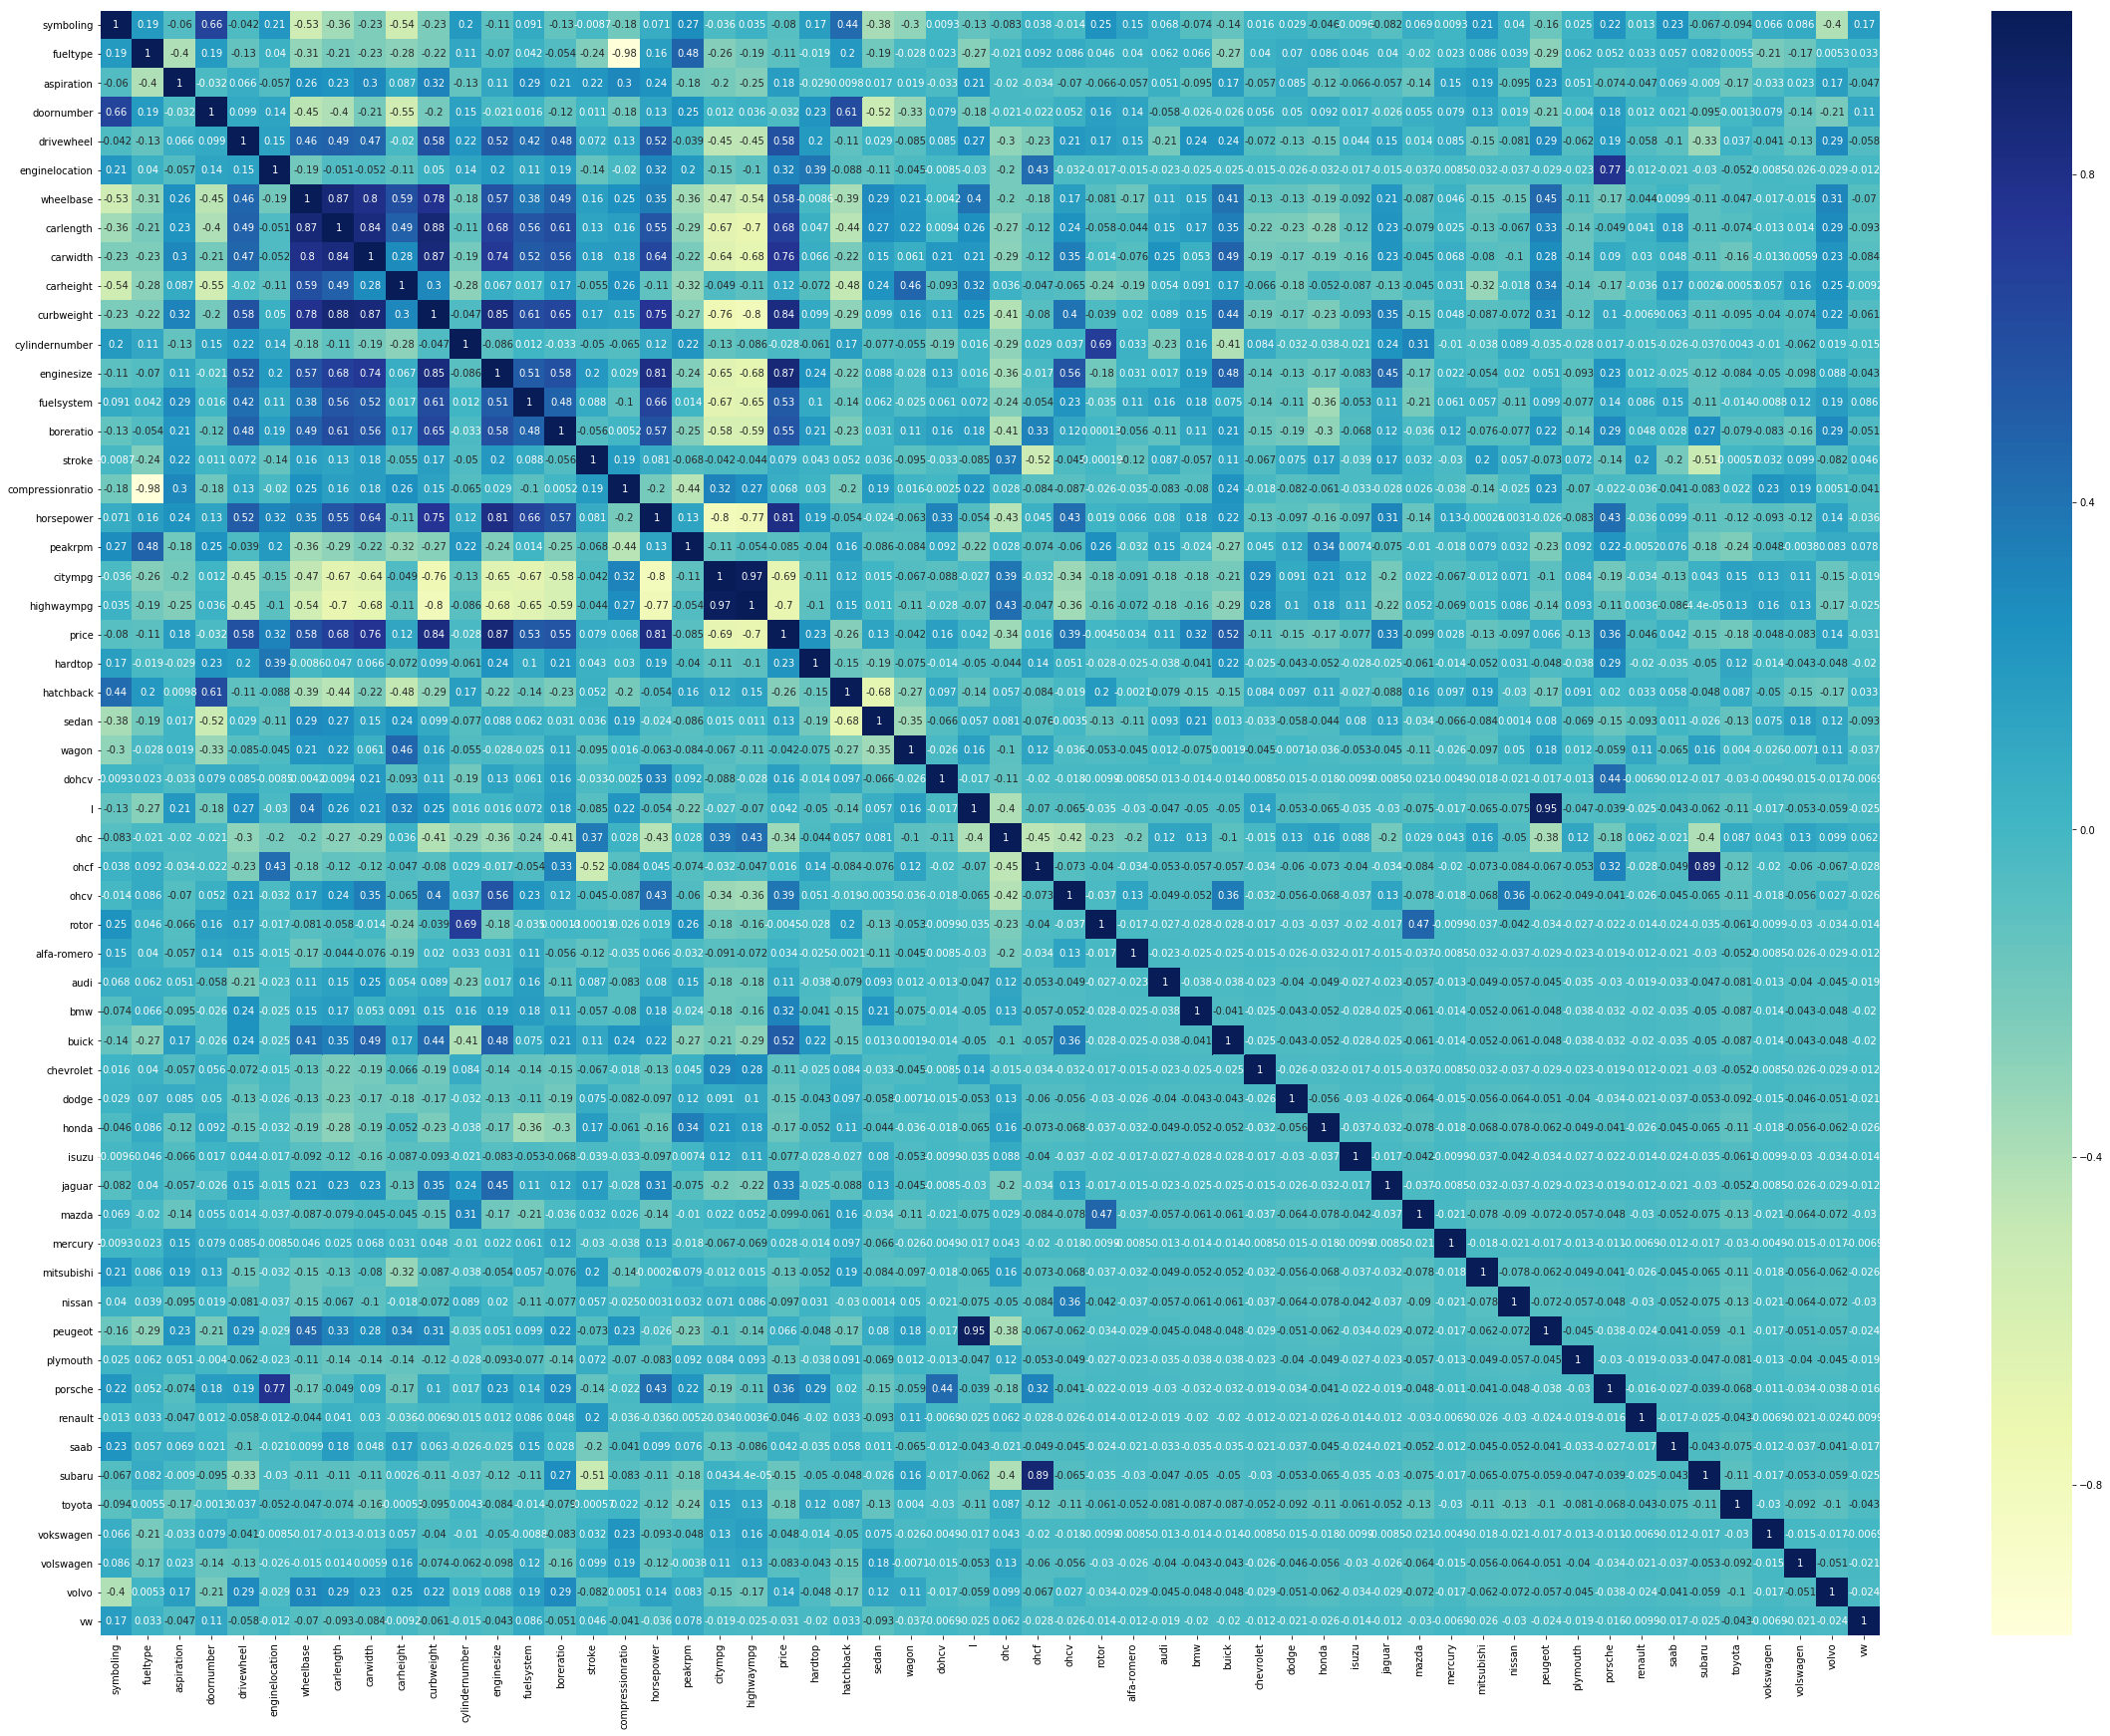

In [3505]:
# Finding correlation

plt.figure(figsize = (40,30))
sns.heatmap(df.corr(),annot = True, cmap = 'YlGnBu')
plt.show

## All data set is ready now for analysis.
### Splitting train and test set

In [3506]:
df_train,df_test = train_test_split(df, train_size = 0.7, random_state =100)
print(df_train.shape)
print(df_test.shape)
df_train.head()


(143, 56)
(62, 56)


,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
122,1,1,0,0,1,0,93.7,167.3,63.8,50.8,...,1,0,0,0,0,0,0,0,0,0
125,3,1,0,1,2,0,94.5,168.9,68.3,50.2,...,0,1,0,0,0,0,0,0,0,0
166,1,1,0,1,2,0,94.5,168.7,64.0,52.6,...,0,0,0,0,0,1,0,0,0,0
1,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,1,0,2,0,104.3,188.8,67.2,57.5,...,0,0,0,0,0,0,0,0,1,0


## Rescaling feature.

## What do you mean by rescaling and why it is important.

How do we rescale:
1. Min-Max scaling (normalisation) : between 0 and 1
2. standardzation (mean 0, sigma -1)

1. normiliasation : x -xmin/xmax - xmin
2. stanardzation : x -mean (mu)/sigma (sd)

In [3507]:
scaler = MinMaxScaler()

# Create list of numeric variable
num_vars = ['drivewheel','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

#2. Fit the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
122,1,1,0,0,0.5,0,0.244828,0.426016,0.291667,0.265487,...,1,0,0,0,0,0,0,0,0,0
125,3,1,0,1,1.0,0,0.272414,0.452033,0.666667,0.212389,...,0,1,0,0,0,0,0,0,0,0
166,1,1,0,1,1.0,0,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,1,0,0,0,0
1,3,1,0,1,1.0,0,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,1,0,1.0,0,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,0,1,0


## Training the Model

In [3508]:
# X_train, y_train
y_train = df_train.pop('price')
X_train = df_train

In [3509]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

## Add a Constant

In [3510]:
# add a constant 

X_train_sm = sm.add_constant(X_train['enginesize'])

## Create First Model

In [3511]:
# Create first model
lr = sm.OLS(y_train,X_train_sm)

## Fit the model

In [3512]:
lr_model = lr.fit()

In [3513]:
#params
lr_model.params

const        -0.072888
enginesize    1.210676
dtype: float64

In [3514]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.09e-44
Time:                        13:10:41   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.000      -0.106      -0.040
enginesize     1.2107      0.058     20.748      0.000       1.095       1.326
==============================================================================
Omnibus:                       23.257   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.410
Skew:                           0.885   Prob(JB):                     9.17e-08
Kurtosis:                       4.520   Cond. No.                         6.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3515]:
# Add another variable horsepower
X_train_sm = X_train[['enginesize','horsepower']]
X_train_sm = sm.add_constant(X_train_sm)


# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

const        -0.078951
enginesize    0.878745
horsepower    0.379117
dtype: float64

In [3516]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     250.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.17e-47
Time:                        13:10:41   Log-Likelihood:                 125.63
No. Observations:                 143   AIC:                            -245.3
Df Residuals:                     140   BIC:                            -236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.016     -4.981      0.000      -0.110      -0.048
enginesize     0.8787      0.096      9.170      0.000       0.689       1.068
horsepower     0.3791      0.090      4.235      0.000       0.202       0.556
==============================================================================
Omnibus:                       15.465   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.301
Skew:                           0.589   Prob(JB):                     1.44e-05
Kurtosis:                       4.534   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3517]:
# add another variable curbweight

X_train_sm = X_train[['enginesize','horsepower','curbweight']]
X_train_sm = sm.add_constant(X_train_sm)


# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

const        -0.126942
enginesize    0.474331
horsepower    0.298222
curbweight    0.402044
dtype: float64

In [3518]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.16e-51
Time:                        13:10:41   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.000      -0.161      -0.093
enginesize     0.4743      0.115      4.114      0.000       0.246       0.702
horsepower     0.2982      0.083      3.589      0.000       0.134       0.463
curbweight     0.4020      0.075      5.384      0.000       0.254       0.550
==============================================================================
Omnibus:                       25.597   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.389
Skew:                           0.751   Prob(JB):                     9.38e-13
Kurtosis:                       5.653   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysis from above stats.

1. If you go in that way certainly you will reach a certain point where you can see a good model.2.
2. This is time cunsuming and but combersion process.
3. Loak at the r2 values it is more than 81% and adjusted R2 is %81 which is nearly same as R2
4. Look at the p valus its almost 0
5. as per adjusted R2 and p values, we can conclude that it might be a good model down the time 
   when we keep adding independent variable but again its a length process.
6. So we have to to take all variable and drop one by one based on VIF and P value.

## Second  approach with VIF

#### What is VIF:

VIF will measure how much the variance of an estimated regression coefficient increases if your predictors are correlated.
1. if VIF or variation is low then its not good for model.
2. if if VIF or variation is low then its  good for model and the model is realible.
3. We will take all variable and then drop one by based on VIF and P values.

In [3519]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'alfa-romero', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'vokswagen',
       'volswagen', 'volvo', 'vw'],
      dtype='object')

In [3520]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
122,1,1,0,0,0.5,0,0.244828,0.426016,0.291667,0.265487,...,1,0,0,0,0,0,0,0,0,0
125,3,1,0,1,1.0,0,0.272414,0.452033,0.666667,0.212389,...,0,1,0,0,0,0,0,0,0,0
166,1,1,0,1,1.0,0,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,1,0,0,0,0
1,3,1,0,1,1.0,0,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,1,0,1.0,0,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,0,1,0


In [3521]:
# build model with all variable

X_train_sm = sm.add_constant(X_train)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

const               3.121021e-01
symboling           2.561208e-03
fueltype           -3.119238e-01
aspiration          6.375072e-02
doornumber         -4.952345e-03
drivewheel          7.801435e-03
enginelocation      2.252441e-01
wheelbase           2.603543e-01
carlength          -1.815778e-01
carwidth            2.581330e-01
carheight          -1.593541e-01
curbweight          4.003772e-01
cylindernumber     -3.001968e-01
enginesize          7.987923e-01
fuelsystem         -5.339093e-02
boreratio          -1.870079e-01
stroke             -7.647209e-02
compressionratio   -3.926541e-01
horsepower         -8.221481e-03
peakrpm             1.709267e-01
citympg             3.884069e-02
highwaympg          1.247671e-01
hardtop            -8.899341e-02
hatchback          -9.938268e-02
sedan              -7.241791e-02
wagon              -5.522672e-02
dohcv              -1.310772e-01
l                   3.257683e-01
ohc                 5.089131e-02
ohcf                1.518993e-01
ohcv      

In [3522]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     56.58
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.63e-51
Time:                        13:10:42   Log-Likelihood:                 268.43
No. Observations:                 143   AIC:                            -430.9
Df Residuals:                      90   BIC:                            -273.8
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3121      0.248      1.256      0.212      -0.181       0.806
symboling            0.0026      0.008      0.335      0.739      -0.013       0.018
fueltype            -0.3119      0.196     -1.590      0.115      -0.702       0.078
aspiration           0.0638      0.027      2.335      0.022       0.010       0.118
doornumber          -0.0050      0.016     -0.319      0.750      -0.036       0.026
drivewheel           0.0078      0.035      0.226      0.822      -0.061       0.076
enginelocation       0.2252      0.064      3.517      0.001       0.098       0.352
wheelbase            0.2604      0.100      2.612      0.011       0.062       0.458
carlength           -0.1816      0.101     -1.799      0.075      -0.382       0.019
carwidth             0.2581      0.108      2.391      0.019       0.044       0.473
carheight           -0.1594      0.053     -2.997      0.004      -0.265      -0.054
curbweight           0.4004      0.111      3.592      0.001       0.179       0.622
cylindernumber      -0.3002      0.147     -2.042      0.044      -0.592      -0.008
enginesize           0.7988      0.210      3.805      0.000       0.382       1.216
fuelsystem          -0.0534      0.026     -2.045      0.044      -0.105      -0.002
boreratio           -0.1870      0.058     -3.242      0.002      -0.302      -0.072
stroke              -0.0765      0.068     -1.124      0.264      -0.212       0.059
compressionratio    -0.3927      0.231     -1.698      0.093      -0.852       0.067
horsepower          -0.0082      0.177     -0.046      0.963      -0.360       0.343
peakrpm              0.1709      0.051      3.356      0.001       0.070       0.272
citympg              0.0388      0.157      0.248      0.805      -0.272       0.350
highwaympg           0.1248      0.143      0.872      0.385      -0.159       0.409
hardtop             -0.0890      0.062     -1.424      0.158      -0.213       0.035
hatchback           -0.0994      0.049     -2.022      0.046      -0.197      -0.002
sedan               -0.0724      0.052     -1.397      0.166      -0.175       0.031
wagon               -0.0552      0.056     -0.991      0.325      -0.166       0.056
dohcv               -0.1311      0.131     -1.004      0.318      -0.390       0.128
l                    0.3258      0.086      3.777      0.000       0.154       0.497
ohc                  0.0509      0.032      1.581      0.117      -0.013       0.115
ohcf                 0.1519      0.040      3.763      0.000       0.072       0.232
ohcv                -0.0202      0.040     -0.507      0.614      -0.099       0.059
rotor                0.3888      0.110      3.549      0.001       0.171       0.606
alfa-romero          0.1169      0.067      1.749      0.084      -0.016       0.250
audi                -0.

In [3523]:
# Create a dataframe that will contain the names of the all the features variables and there resopective labels

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
49,subaru,inf
28,ohcf,inf
5,enginelocation,inf
1,fueltype,463.50
19,citympg,246.35
12,enginesize,237.24
20,highwaympg,233.32
11,cylindernumber,214.18
7,carlength,212.45
8,carwidth,178.97


In [3524]:
# Some VIF value are infinite and NAN so we need to drop first.

X = X_train.drop(['subaru','ohcf','enginelocation','mercury','vokswagen'],axis=1)

### Test Condition and remove:
 
1. High p value , high VIP : remove it
2. High low
   1. High p , low VIF : remove first 
   2. Low P, high VIF : remove  after above one 
3. Low p, low VIF : Keep it

In [3525]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     50.12
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.75e-49
Time:                        13:10:42   Log-Likelihood:                 255.81
No. Observations:                 143   AIC:                            -409.6
Df Residuals:                      92   BIC:                            -258.5
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5613      0.244      2.300      0.024       0.077       1.046
symboling           -0.0007      0.008     -0.090      0.929      -0.017       0.016
fueltype            -0.4567      0.207     -2.203      0.030      -0.868      -0.045
aspiration           0.0547      0.029      1.877      0.064      -0.003       0.113
doornumber          -0.0086      0.017     -0.514      0.608      -0.042       0.025
drivewheel          -0.0070      0.037     -0.188      0.851      -0.080       0.066
wheelbase            0.1966      0.106      1.856      0.067      -0.014       0.407
carlength           -0.1158      0.105     -1.106      0.272      -0.324       0.092
carwidth             0.2224      0.110      2.018      0.047       0.004       0.441
carheight           -0.1241      0.057     -2.189      0.031      -0.237      -0.012
curbweight           0.3096      0.118      2.623      0.010       0.075       0.544
cylindernumber      -0.2566      0.158     -1.621      0.108      -0.571       0.058
enginesize           0.8925      0.224      3.989      0.000       0.448       1.337
fuelsystem          -0.0555      0.028     -1.978      0.051      -0.111       0.000
boreratio           -0.2091      0.059     -3.539      0.001      -0.326      -0.092
stroke              -0.1300      0.067     -1.936      0.056      -0.263       0.003
compressionratio    -0.5471      0.246     -2.228      0.028      -1.035      -0.059
horsepower           0.0461      0.190      0.242      0.809      -0.332       0.424
peakrpm              0.1491      0.052      2.852      0.005       0.045       0.253
citympg              0.0141      0.169      0.083      0.934      -0.322       0.350
highwaympg           0.1537      0.153      1.002      0.319      -0.151       0.458
hardtop              0.0006      0.061      0.010      0.992      -0.120       0.122
hatchback           -0.0842      0.050     -1.683      0.096      -0.184       0.015
sedan               -0.0649      0.053     -1.218      0.226      -0.171       0.041
wagon               -0.0509      0.057     -0.888      0.377      -0.165       0.063
dohcv               -0.2753      0.136     -2.026      0.046      -0.545      -0.005
l                    0.2528      0.091      2.789      0.006       0.073       0.433
ohc                  0.0076      0.029      0.259      0.796      -0.051       0.066
ohcv                -0.0654      0.040     -1.648      0.103      -0.144       0.013
rotor                0.3754      0.118      3.183      0.002       0.141       0.610
alfa-romero          0.0676      0.059      1.138      0.258      -0.050       0.185
audi                -0.0500      0.063     -0.796      0.428      -0.175       0.075
bmw                  0.2651      0.058      4.560      0.000       0.150       0.381
buick                0.

In [3526]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,fueltype,356.57
18,citympg,245.86
11,enginesize,230.80
19,highwaympg,230.52
10,cylindernumber,212.04
6,carlength,195.96
7,carwidth,164.18
16,horsepower,160.58
9,curbweight,159.94
5,wheelbase,132.76


In [3527]:
X = X.drop(['citympg'],axis=1)

In [3528]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     51.69
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.81e-50
Time:                        13:10:42   Log-Likelihood:                 255.80
No. Observations:                 143   AIC:                            -411.6
Df Residuals:                      93   BIC:                            -263.5
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5610      0.243      2.312      0.023       0.079       1.043
symboling           -0.0007      0.008     -0.091      0.928      -0.017       0.015
fueltype            -0.4544      0.204     -2.224      0.029      -0.860      -0.049
aspiration           0.0549      0.029      1.903      0.060      -0.002       0.112
doornumber          -0.0084      0.016     -0.510      0.611      -0.041       0.024
drivewheel          -0.0073      0.037     -0.200      0.842      -0.080       0.065
wheelbase            0.1954      0.104      1.872      0.064      -0.012       0.403
carlength           -0.1162      0.104     -1.117      0.267      -0.323       0.090
carwidth             0.2246      0.106      2.111      0.037       0.013       0.436
carheight           -0.1234      0.056     -2.213      0.029      -0.234      -0.013
curbweight           0.3082      0.116      2.653      0.009       0.077       0.539
cylindernumber      -0.2593      0.154     -1.683      0.096      -0.565       0.047
enginesize           0.8949      0.221      4.054      0.000       0.457       1.333
fuelsystem          -0.0554      0.028     -1.987      0.050      -0.111   -3.53e-05
boreratio           -0.2104      0.057     -3.711      0.000      -0.323      -0.098
stroke              -0.1302      0.067     -1.949      0.054      -0.263       0.002
compressionratio    -0.5435      0.240     -2.261      0.026      -1.021      -0.066
horsepower           0.0441      0.188      0.235      0.815      -0.329       0.417
peakrpm              0.1488      0.052      2.869      0.005       0.046       0.252
highwaympg           0.1646      0.078      2.106      0.038       0.009       0.320
hardtop              0.0009      0.060      0.015      0.988      -0.119       0.121
hatchback           -0.0839      0.050     -1.691      0.094      -0.182       0.015
sedan               -0.0646      0.053     -1.221      0.225      -0.170       0.040
wagon               -0.0504      0.057     -0.889      0.377      -0.163       0.062
dohcv               -0.2775      0.132     -2.095      0.039      -0.541      -0.015
l                    0.2533      0.090      2.814      0.006       0.075       0.432
ohc                  0.0069      0.028      0.246      0.806      -0.048       0.062
ohcv                -0.0663      0.038     -1.732      0.087      -0.142       0.010
rotor                0.3763      0.117      3.221      0.002       0.144       0.608
alfa-romero          0.0670      0.059      1.142      0.256      -0.050       0.184
audi                -0.0509      0.061     -0.828      0.410      -0.173       0.071
bmw                  0.2655      0.058      4.604      0.000       0.151       0.380
buick                0.0058      0.082      0.070      0.944      -0.158       0.169
chevrolet           -0.

In [3529]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,fueltype,322.92
11,enginesize,227.07
10,cylindernumber,203.12
6,carlength,195.52
16,horsepower,158.17
9,curbweight,156.47
7,carwidth,154.19
5,wheelbase,130.23
21,sedan,74.98
14,stroke,71.34


In [3530]:
X = X.drop(['cylindernumber'],axis=1)

In [3531]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     51.70
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.06e-50
Time:                        13:10:43   Log-Likelihood:                 253.66
No. Observations:                 143   AIC:                            -409.3
Df Residuals:                      94   BIC:                            -264.1
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6164      0.243      2.539      0.013       0.134       1.098
symboling           -0.0012      0.008     -0.150      0.881      -0.018       0.015
fueltype            -0.5718      0.194     -2.949      0.004      -0.957      -0.187
aspiration           0.0540      0.029      1.854      0.067      -0.004       0.112
doornumber          -0.0090      0.017     -0.545      0.587      -0.042       0.024
drivewheel          -0.0092      0.037     -0.250      0.803      -0.082       0.064
wheelbase            0.1866      0.105      1.773      0.079      -0.022       0.395
carlength           -0.1041      0.105     -0.993      0.323      -0.312       0.104
carwidth             0.2295      0.107      2.137      0.035       0.016       0.443
carheight           -0.1341      0.056     -2.397      0.019      -0.245      -0.023
curbweight           0.3132      0.117      2.671      0.009       0.080       0.546
enginesize           0.8652      0.222      3.894      0.000       0.424       1.306
fuelsystem          -0.0508      0.028     -1.814      0.073      -0.106       0.005
boreratio           -0.1834      0.055     -3.341      0.001      -0.292      -0.074
stroke              -0.1158      0.067     -1.731      0.087      -0.249       0.017
compressionratio    -0.7042      0.223     -3.163      0.002      -1.146      -0.262
horsepower          -0.0589      0.179     -0.329      0.743      -0.415       0.297
peakrpm              0.1675      0.051      3.275      0.001       0.066       0.269
highwaympg           0.1787      0.078      2.277      0.025       0.023       0.334
hardtop             -0.0131      0.060     -0.216      0.829      -0.133       0.107
hatchback           -0.1022      0.049     -2.093      0.039      -0.199      -0.005
sedan               -0.0833      0.052     -1.595      0.114      -0.187       0.020
wagon               -0.0707      0.056     -1.264      0.209      -0.182       0.040
dohcv               -0.1172      0.093     -1.262      0.210      -0.302       0.067
l                    0.1630      0.073      2.234      0.028       0.018       0.308
ohc                  0.0096      0.028      0.343      0.733      -0.046       0.065
ohcv                -0.0641      0.039     -1.660      0.100      -0.141       0.013
rotor                0.2094      0.062      3.360      0.001       0.086       0.333
alfa-romero          0.0621      0.059      1.049      0.297      -0.055       0.180
audi                -0.0009      0.054     -0.017      0.986      -0.109       0.107
bmw                  0.2519      0.058      4.370      0.000       0.137       0.366
buick                0.0937      0.064      1.457      0.148      -0.034       0.221
chevrolet           -0.0736      0.058     -1.268      0.208      -0.189       0.042
dodge               -0.

In [3532]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
10,enginesize,225.53
1,fueltype,220.05
6,carlength,194.64
9,curbweight,156.07
7,carwidth,154.18
15,horsepower,141.10
5,wheelbase,129.99
20,sedan,71.97
13,stroke,69.00
17,highwaympg,58.42


In [3533]:
X = X.drop(['carlength'],axis=1)

In [3534]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     52.79
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.56e-51
Time:                        13:10:43   Log-Likelihood:                 252.91
No. Observations:                 143   AIC:                            -409.8
Df Residuals:                      95   BIC:                            -267.6
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6194      0.243      2.552      0.012       0.138       1.101
symboling           -0.0006      0.008     -0.074      0.941      -0.017       0.016
fueltype            -0.5798      0.194     -2.993      0.004      -0.964      -0.195
aspiration           0.0577      0.029      1.995      0.049       0.000       0.115
doornumber          -0.0085      0.017     -0.512      0.610      -0.041       0.024
drivewheel          -0.0111      0.037     -0.303      0.763      -0.084       0.062
wheelbase            0.1517      0.099      1.529      0.130      -0.045       0.349
carwidth             0.2043      0.104      1.958      0.053      -0.003       0.411
carheight           -0.1277      0.056     -2.297      0.024      -0.238      -0.017
curbweight           0.2801      0.112      2.491      0.014       0.057       0.503
enginesize           0.8590      0.222      3.868      0.000       0.418       1.300
fuelsystem          -0.0502      0.028     -1.793      0.076      -0.106       0.005
boreratio           -0.1933      0.054     -3.579      0.001      -0.300      -0.086
stroke              -0.1155      0.067     -1.728      0.087      -0.248       0.017
compressionratio    -0.7127      0.222     -3.203      0.002      -1.154      -0.271
horsepower          -0.0581      0.179     -0.324      0.747      -0.414       0.298
peakrpm              0.1653      0.051      3.235      0.002       0.064       0.267
highwaympg           0.1895      0.078      2.440      0.017       0.035       0.344
hardtop             -0.0200      0.060     -0.333      0.740      -0.139       0.099
hatchback           -0.1060      0.049     -2.176      0.032      -0.203      -0.009
sedan               -0.0936      0.051     -1.829      0.071      -0.195       0.008
wagon               -0.0835      0.054     -1.532      0.129      -0.192       0.025
dohcv               -0.1010      0.091     -1.104      0.272      -0.283       0.081
l                    0.1607      0.073      2.203      0.030       0.016       0.305
ohc                  0.0092      0.028      0.327      0.744      -0.047       0.065
ohcv                -0.0573      0.038     -1.509      0.135      -0.133       0.018
rotor                0.2154      0.062      3.473      0.001       0.092       0.339
alfa-romero          0.0491      0.058      0.850      0.397      -0.066       0.164
audi                -0.0053      0.054     -0.097      0.923      -0.113       0.102
bmw                  0.2500      0.058      4.339      0.000       0.136       0.364
buick                0.0978      0.064      1.525      0.131      -0.030       0.225
chevrolet           -0.0711      0.058     -1.226      0.223      -0.186       0.044
dodge               -0.0968      0.052     -1.878      0.063      -0.199       0.006
honda               -0.

In [3535]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
9,enginesize,225.35
1,fueltype,218.36
6,carwidth,145.14
8,curbweight,143.23
14,horsepower,141.10
5,wheelbase,115.48
19,sedan,69.15
12,stroke,69.00
16,highwaympg,57.21
7,carheight,50.61


In [3536]:
X = X.drop(['horsepower'],axis=1)

In [3537]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     54.44
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.44e-52
Time:                        13:10:43   Log-Likelihood:                 252.83
No. Observations:                 143   AIC:                            -411.7
Df Residuals:                      96   BIC:                            -272.4
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6228      0.241      2.580      0.011       0.144       1.102
symboling         7.581e-06      0.008      0.001      0.999      -0.016       0.016
fueltype            -0.5786      0.193     -3.002      0.003      -0.961      -0.196
aspiration           0.0522      0.023      2.227      0.028       0.006       0.099
doornumber          -0.0088      0.016     -0.539      0.591      -0.041       0.024
drivewheel          -0.0134      0.036     -0.373      0.710      -0.085       0.058
wheelbase            0.1615      0.094      1.718      0.089      -0.025       0.348
carwidth             0.1968      0.101      1.944      0.055      -0.004       0.398
carheight           -0.1260      0.055     -2.288      0.024      -0.235      -0.017
curbweight           0.2750      0.111      2.482      0.015       0.055       0.495
enginesize           0.8063      0.151      5.355      0.000       0.507       1.105
fuelsystem          -0.0530      0.026     -2.002      0.048      -0.106      -0.000
boreratio           -0.1884      0.052     -3.649      0.000      -0.291      -0.086
stroke              -0.1125      0.066     -1.707      0.091      -0.243       0.018
compressionratio    -0.7051      0.220     -3.202      0.002      -1.142      -0.268
peakrpm              0.1572      0.044      3.536      0.001       0.069       0.246
highwaympg           0.1914      0.077      2.483      0.015       0.038       0.344
hardtop             -0.0262      0.057     -0.462      0.645      -0.139       0.086
hatchback           -0.1113      0.046     -2.440      0.017      -0.202      -0.021
sedan               -0.0989      0.048     -2.052      0.043      -0.195      -0.003
wagon               -0.0895      0.051     -1.758      0.082      -0.191       0.012
dohcv               -0.1186      0.073     -1.618      0.109      -0.264       0.027
l                    0.1597      0.073      2.202      0.030       0.016       0.304
ohc                  0.0112      0.027      0.411      0.682      -0.043       0.065
ohcv                -0.0540      0.036     -1.483      0.141      -0.126       0.018
rotor                0.2087      0.058      3.587      0.001       0.093       0.324
alfa-romero          0.0466      0.057      0.818      0.415      -0.066       0.160
audi                -0.0049      0.054     -0.090      0.928      -0.112       0.102
bmw                  0.2500      0.057      4.359      0.000       0.136       0.364
buick                0.1038      0.061      1.699      0.093      -0.017       0.225
chevrolet           -0.0721      0.058     -1.250      0.214      -0.186       0.042
dodge               -0.0955      0.051     -1.868      0.065      -0.197       0.006
honda               -0.0756      0.050     -1.503      0.136      -0.176       0.024
isuzu               -0.

In [3538]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,fueltype,211.54
8,curbweight,140.67
6,carwidth,137.12
5,wheelbase,104.55
9,enginesize,103.97
12,stroke,67.11
18,sedan,62.05
15,highwaympg,56.80
7,carheight,50.07
13,compressionratio,40.20


In [3539]:
X = X.drop(['wheelbase'],axis=1)

In [3540]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     54.49
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.61e-52
Time:                        13:10:44   Log-Likelihood:                 250.67
No. Observations:                 143   AIC:                            -409.3
Df Residuals:                      97   BIC:                            -273.0
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6479      0.243      2.663      0.009       0.165       1.131
symboling           -0.0035      0.008     -0.447      0.656      -0.019       0.012
fueltype            -0.6099      0.194     -3.147      0.002      -0.995      -0.225
aspiration           0.0345      0.021      1.622      0.108      -0.008       0.077
doornumber          -0.0079      0.017     -0.477      0.635      -0.041       0.025
drivewheel          -0.0003      0.035     -0.009      0.993      -0.071       0.070
carwidth             0.3076      0.079      3.905      0.000       0.151       0.464
carheight           -0.0911      0.052     -1.762      0.081      -0.194       0.012
curbweight           0.2800      0.112      2.503      0.014       0.058       0.502
enginesize           0.7464      0.148      5.045      0.000       0.453       1.040
fuelsystem          -0.0423      0.026     -1.627      0.107      -0.094       0.009
boreratio           -0.1926      0.052     -3.699      0.000      -0.296      -0.089
stroke              -0.1086      0.067     -1.633      0.106      -0.241       0.023
compressionratio    -0.7257      0.222     -3.267      0.002      -1.166      -0.285
peakrpm              0.1411      0.044      3.214      0.002       0.054       0.228
highwaympg           0.1504      0.074      2.031      0.045       0.003       0.297
hardtop              0.0093      0.053      0.174      0.862      -0.097       0.115
hatchback           -0.0810      0.042     -1.906      0.060      -0.165       0.003
sedan               -0.0690      0.045     -1.519      0.132      -0.159       0.021
wagon               -0.0623      0.049     -1.274      0.206      -0.159       0.035
dohcv               -0.1347      0.073     -1.835      0.070      -0.280       0.011
l                    0.1491      0.073      2.042      0.044       0.004       0.294
ohc                  0.0002      0.027      0.008      0.994      -0.053       0.053
ohcv                -0.0746      0.035     -2.146      0.034      -0.144      -0.006
rotor                0.1901      0.058      3.292      0.001       0.075       0.305
alfa-romero          0.0447      0.058      0.778      0.438      -0.069       0.159
audi                -0.0010      0.054     -0.019      0.985      -0.109       0.107
bmw                  0.2682      0.057      4.711      0.000       0.155       0.381
buick                0.1261      0.060      2.091      0.039       0.006       0.246
chevrolet           -0.0460      0.056     -0.819      0.415      -0.157       0.065
dodge               -0.0751      0.050     -1.495      0.138      -0.175       0.025
honda               -0.0651      0.050     -1.290      0.200      -0.165       0.035
isuzu                0.0089      0.052      0.172      0.864      -0.094       0.112
jaguar               0.

In [3541]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,fueltype,208.87
7,curbweight,140.46
8,enginesize,98.10
5,carwidth,81.15
11,stroke,66.87
17,sedan,53.73
14,highwaympg,51.53
6,carheight,42.48
12,compressionratio,40.20
10,boreratio,36.77


In [3542]:
X = X.drop(['stroke'],axis=1)

In [3543]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     54.74
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.76e-52
Time:                        13:10:44   Log-Likelihood:                 248.73
No. Observations:                 143   AIC:                            -407.5
Df Residuals:                      98   BIC:                            -274.1
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5101      0.230      2.216      0.029       0.053       0.967
symboling           -0.0037      0.008     -0.474      0.636      -0.019       0.012
fueltype            -0.4796      0.178     -2.693      0.008      -0.833      -0.126
aspiration           0.0392      0.021      1.843      0.068      -0.003       0.081
doornumber          -0.0070      0.017     -0.416      0.678      -0.040       0.026
drivewheel          -0.0135      0.035     -0.388      0.699      -0.083       0.056
carwidth             0.2918      0.079      3.701      0.000       0.135       0.448
carheight           -0.1100      0.051     -2.164      0.033      -0.211      -0.009
curbweight           0.2709      0.113      2.404      0.018       0.047       0.494
enginesize           0.6795      0.143      4.740      0.000       0.395       0.964
fuelsystem          -0.0455      0.026     -1.741      0.085      -0.097       0.006
boreratio           -0.1765      0.052     -3.423      0.001      -0.279      -0.074
compressionratio    -0.5783      0.205     -2.826      0.006      -0.984      -0.172
peakrpm              0.1494      0.044      3.397      0.001       0.062       0.237
highwaympg           0.1415      0.074      1.900      0.060      -0.006       0.289
hardtop             -0.0063      0.053     -0.119      0.905      -0.111       0.099
hatchback           -0.0953      0.042     -2.271      0.025      -0.178      -0.012
sedan               -0.0815      0.045     -1.807      0.074      -0.171       0.008
wagon               -0.0683      0.049     -1.389      0.168      -0.166       0.029
dohcv               -0.1362      0.074     -1.840      0.069      -0.283       0.011
l                    0.1377      0.073      1.880      0.063      -0.008       0.283
ohc                 -0.0110      0.026     -0.423      0.673      -0.063       0.041
ohcv                -0.0543      0.033     -1.660      0.100      -0.119       0.011
rotor                0.1581      0.055      2.887      0.005       0.049       0.267
alfa-romero          0.0315      0.057      0.548      0.585      -0.082       0.145
audi                -0.0051      0.055     -0.092      0.927      -0.114       0.104
bmw                  0.2876      0.056      5.123      0.000       0.176       0.399
buick                0.1391      0.060      2.306      0.023       0.019       0.259
chevrolet           -0.0637      0.056     -1.147      0.254      -0.174       0.047
dodge               -0.0980      0.049     -2.013      0.047      -0.195      -0.001
honda               -0.0966      0.047     -2.055      0.043      -0.190      -0.003
isuzu               -0.0054      0.052     -0.105      0.917      -0.108       0.097
jaguar               0.0685      0.072      0.955      0.342      -0.074       0.211
mazda               -0.

In [3544]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,fueltype,193.61
7,curbweight,138.28
8,enginesize,91.43
5,carwidth,80.87
16,sedan,51.33
13,highwaympg,50.43
11,compressionratio,37.97
6,carheight,37.69
10,boreratio,36.63
4,drivewheel,32.67


In [3545]:
X = X.drop(['sedan'],axis=1)

In [3546]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     54.68
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.14e-52
Time:                        13:10:44   Log-Likelihood:                 246.39
No. Observations:                 143   AIC:                            -404.8
Df Residuals:                      99   BIC:                            -274.4
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4473      0.230      1.944      0.055      -0.009       0.904
symboling            0.0005      0.008      0.072      0.942      -0.014       0.016
fueltype            -0.4877      0.180     -2.708      0.008      -0.845      -0.130
aspiration           0.0350      0.021      1.636      0.105      -0.007       0.077
doornumber          -0.0037      0.017     -0.221      0.826      -0.037       0.030
drivewheel          -0.0271      0.034     -0.787      0.433      -0.095       0.041
carwidth             0.2918      0.080      3.660      0.000       0.134       0.450
carheight           -0.1257      0.051     -2.482      0.015      -0.226      -0.025
curbweight           0.2612      0.114      2.295      0.024       0.035       0.487
enginesize           0.6749      0.145      4.656      0.000       0.387       0.963
fuelsystem          -0.0439      0.026     -1.660      0.100      -0.096       0.009
boreratio           -0.1622      0.052     -3.147      0.002      -0.264      -0.060
compressionratio    -0.5887      0.207     -2.845      0.005      -0.999      -0.178
peakrpm              0.1417      0.044      3.201      0.002       0.054       0.230
highwaympg           0.1374      0.075      1.824      0.071      -0.012       0.287
hardtop              0.0628      0.037      1.699      0.092      -0.011       0.136
hatchback           -0.0244      0.015     -1.617      0.109      -0.054       0.006
wagon                0.0144      0.018      0.789      0.432      -0.022       0.050
dohcv               -0.1307      0.075     -1.748      0.084      -0.279       0.018
l                    0.1284      0.074      1.737      0.086      -0.018       0.275
ohc                 -0.0188      0.026     -0.726      0.470      -0.070       0.033
ohcv                -0.0598      0.033     -1.816      0.072      -0.125       0.006
rotor                0.1452      0.055      2.644      0.010       0.036       0.254
alfa-romero          0.0873      0.049      1.783      0.078      -0.010       0.184
audi                 0.0075      0.055      0.137      0.891      -0.102       0.117
bmw                  0.3059      0.056      5.477      0.000       0.195       0.417
buick                0.1815      0.056      3.230      0.002       0.070       0.293
chevrolet           -0.0461      0.055     -0.833      0.407      -0.156       0.064
dodge               -0.0821      0.048     -1.696      0.093      -0.178       0.014
honda               -0.0761      0.046     -1.650      0.102      -0.168       0.015
isuzu                0.0093      0.052      0.180      0.857      -0.093       0.111
jaguar               0.0819      0.072      1.136      0.259      -0.061       0.225
mazda               -0.0043      0.039     -0.111      0.912      -0.081       0.072
mitsubishi          -0.

In [3547]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,fueltype,149.30
7,curbweight,137.33
8,enginesize,91.40
5,carwidth,80.82
13,highwaympg,50.21
10,boreratio,36.20
6,carheight,35.51
11,compressionratio,32.17
4,drivewheel,31.25
19,ohc,24.46


In [3548]:
X = X.drop(['highwaympg'],axis=1)

In [3549]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     54.64
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.65e-53
Time:                        13:10:44   Log-Likelihood:                 244.02
No. Observations:                 143   AIC:                            -402.0
Df Residuals:                     100   BIC:                            -274.6
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5418      0.227      2.389      0.019       0.092       0.992
symboling            0.0015      0.008      0.200      0.842      -0.014       0.017
fueltype            -0.4923      0.182     -2.702      0.008      -0.854      -0.131
aspiration           0.0250      0.021      1.194      0.235      -0.017       0.066
doornumber          -0.0048      0.017     -0.285      0.777      -0.039       0.029
drivewheel          -0.0319      0.035     -0.919      0.360      -0.101       0.037
carwidth             0.3066      0.080      3.822      0.000       0.147       0.466
carheight           -0.1319      0.051     -2.581      0.011      -0.233      -0.031
curbweight           0.1718      0.104      1.653      0.102      -0.034       0.378
enginesize           0.6357      0.145      4.383      0.000       0.348       0.923
fuelsystem          -0.0445      0.027     -1.663      0.099      -0.097       0.009
boreratio           -0.1641      0.052     -3.148      0.002      -0.268      -0.061
compressionratio    -0.5520      0.208     -2.650      0.009      -0.965      -0.139
peakrpm              0.1243      0.044      2.842      0.005       0.038       0.211
hardtop              0.0642      0.037      1.719      0.089      -0.010       0.138
hatchback           -0.0243      0.015     -1.591      0.115      -0.055       0.006
wagon                0.0147      0.018      0.799      0.426      -0.022       0.051
dohcv               -0.1027      0.074     -1.387      0.168      -0.250       0.044
l                    0.1498      0.074      2.030      0.045       0.003       0.296
ohc                 -0.0179      0.026     -0.681      0.498      -0.070       0.034
ohcv                -0.0573      0.033     -1.719      0.089      -0.123       0.009
rotor                0.1124      0.052      2.142      0.035       0.008       0.217
alfa-romero          0.0860      0.050      1.737      0.086      -0.012       0.184
audi                 0.0030      0.056      0.054      0.957      -0.107       0.113
bmw                  0.3174      0.056      5.654      0.000       0.206       0.429
buick                0.1896      0.057      3.347      0.001       0.077       0.302
chevrolet           -0.0179      0.054     -0.334      0.739      -0.125       0.089
dodge               -0.0715      0.049     -1.472      0.144      -0.168       0.025
honda               -0.0644      0.046     -1.394      0.166      -0.156       0.027
isuzu                0.0277      0.051      0.543      0.588      -0.074       0.129
jaguar               0.1134      0.071      1.602      0.112      -0.027       0.254
mazda                0.0008      0.039      0.019      0.985      -0.077       0.078
mitsubishi          -0.1100      0.047     -2.341      0.021      -0.203      -0.017
nissan              -0.

In [3550]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
7,curbweight,115.35
8,enginesize,89.30
1,fueltype,83.28
5,carwidth,80.47
10,boreratio,36.07
6,carheight,35.49
4,drivewheel,31.01
18,ohc,24.43
33,peugeot,21.41
12,peakrpm,19.59


In [3551]:
X = X.drop(['drivewheel'],axis=1)

In [3552]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     56.03
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.53e-53
Time:                        13:10:45   Log-Likelihood:                 243.42
No. Observations:                 143   AIC:                            -402.8
Df Residuals:                     101   BIC:                            -278.4
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5533      0.226      2.445      0.016       0.104       1.002
symboling            0.0008      0.008      0.112      0.911      -0.014       0.016
fueltype            -0.5071      0.181     -2.797      0.006      -0.867      -0.147
aspiration           0.0266      0.021      1.278      0.204      -0.015       0.068
doornumber          -0.0059      0.017     -0.350      0.727      -0.039       0.028
carwidth             0.2989      0.080      3.749      0.000       0.141       0.457
carheight           -0.1242      0.050     -2.465      0.015      -0.224      -0.024
curbweight           0.1754      0.104      1.691      0.094      -0.030       0.381
enginesize           0.6174      0.144      4.301      0.000       0.333       0.902
fuelsystem          -0.0476      0.026     -1.795      0.076      -0.100       0.005
boreratio           -0.1663      0.052     -3.197      0.002      -0.270      -0.063
compressionratio    -0.5739      0.207     -2.775      0.007      -0.984      -0.164
peakrpm              0.1200      0.043      2.762      0.007       0.034       0.206
hardtop              0.0640      0.037      1.713      0.090      -0.010       0.138
hatchback           -0.0239      0.015     -1.564      0.121      -0.054       0.006
wagon                0.0152      0.018      0.826      0.411      -0.021       0.052
dohcv               -0.0966      0.074     -1.311      0.193      -0.243       0.050
l                    0.1494      0.074      2.025      0.046       0.003       0.296
ohc                 -0.0145      0.026     -0.556      0.579      -0.066       0.037
ohcv                -0.0513      0.033     -1.571      0.119      -0.116       0.013
rotor                0.1074      0.052      2.058      0.042       0.004       0.211
alfa-romero          0.0705      0.047      1.516      0.133      -0.022       0.163
audi                 0.0052      0.055      0.093      0.926      -0.105       0.115
bmw                  0.2985      0.052      5.720      0.000       0.195       0.402
buick                0.1715      0.053      3.232      0.002       0.066       0.277
chevrolet           -0.0258      0.053     -0.486      0.628      -0.131       0.079
dodge               -0.0787      0.048     -1.643      0.104      -0.174       0.016
honda               -0.0725      0.045     -1.598      0.113      -0.162       0.017
isuzu                0.0134      0.049      0.275      0.784      -0.083       0.110
jaguar               0.1072      0.070      1.521      0.131      -0.033       0.247
mazda               -0.0093      0.037     -0.249      0.804      -0.083       0.065
mitsubishi          -0.1152      0.047     -2.470      0.015      -0.208      -0.023
nissan              -0.0244      0.037     -0.666      0.507      -0.097       0.048
peugeot             -0.

In [3553]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
6,curbweight,115.09
7,enginesize,87.57
1,fueltype,81.39
4,carwidth,79.40
9,boreratio,36.04
5,carheight,34.07
17,ohc,23.91
32,peugeot,20.05
11,peakrpm,19.35
16,l,17.77


In [3554]:
X = X.drop(['ohc'],axis=1)

In [3555]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     57.82
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.32e-54
Time:                        13:10:45   Log-Likelihood:                 243.20
No. Observations:                 143   AIC:                            -404.4
Df Residuals:                     102   BIC:                            -282.9
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5452      0.225      2.423      0.017       0.099       0.992
symboling            0.0016      0.007      0.216      0.829      -0.013       0.016
fueltype            -0.5028      0.181     -2.785      0.006      -0.861      -0.145
aspiration           0.0268      0.021      1.292      0.199      -0.014       0.068
doornumber          -0.0081      0.016     -0.491      0.624      -0.041       0.025
carwidth             0.2902      0.078      3.724      0.000       0.136       0.445
carheight           -0.1277      0.050     -2.562      0.012      -0.226      -0.029
curbweight           0.1857      0.102      1.825      0.071      -0.016       0.388
enginesize           0.6365      0.139      4.581      0.000       0.361       0.912
fuelsystem          -0.0464      0.026     -1.762      0.081      -0.099       0.006
boreratio           -0.1691      0.052     -3.277      0.001      -0.271      -0.067
compressionratio    -0.5688      0.206     -2.763      0.007      -0.977      -0.160
peakrpm              0.1289      0.040      3.202      0.002       0.049       0.209
hardtop              0.0631      0.037      1.698      0.093      -0.011       0.137
hatchback           -0.0235      0.015     -1.547      0.125      -0.054       0.007
wagon                0.0149      0.018      0.815      0.417      -0.021       0.051
dohcv               -0.0892      0.072     -1.235      0.220      -0.232       0.054
l                    0.1661      0.067      2.475      0.015       0.033       0.299
ohcv                -0.0465      0.031     -1.481      0.142      -0.109       0.016
rotor                0.1172      0.049      2.396      0.018       0.020       0.214
alfa-romero          0.0632      0.044      1.421      0.158      -0.025       0.151
audi                -0.0135      0.044     -0.307      0.760      -0.101       0.074
bmw                  0.2791      0.039      7.207      0.000       0.202       0.356
buick                0.1558      0.045      3.477      0.001       0.067       0.245
chevrolet           -0.0407      0.046     -0.892      0.374      -0.131       0.050
dodge               -0.0951      0.038     -2.526      0.013      -0.170      -0.020
honda               -0.0884      0.035     -2.517      0.013      -0.158      -0.019
isuzu               -0.0019      0.040     -0.048      0.962      -0.081       0.077
jaguar               0.0901      0.063      1.426      0.157      -0.035       0.215
mazda               -0.0224      0.029     -0.773      0.441      -0.080       0.035
mitsubishi          -0.1332      0.033     -3.985      0.000      -0.199      -0.067
nissan              -0.0382      0.027     -1.427      0.157      -0.091       0.015
peugeot             -0.1992      0.077     -2.592      0.011      -0.352      -0.047
plymouth            -0.

In [3556]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
6,curbweight,111.76
7,enginesize,82.45
1,fueltype,80.74
4,carwidth,76.59
9,boreratio,35.46
5,carheight,33.19
31,peugeot,17.10
11,peakrpm,16.65
16,l,14.78
8,fuelsystem,12.96


In [3557]:
X = X.drop(['fuelsystem'],axis=1)

In [3558]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     58.04
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.36e-54
Time:                        13:10:45   Log-Likelihood:                 241.06
No. Observations:                 143   AIC:                            -402.1
Df Residuals:                     103   BIC:                            -283.6
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4443      0.220      2.021      0.046       0.008       0.880
symboling            0.0028      0.007      0.371      0.711      -0.012       0.018
fueltype            -0.4195      0.176     -2.383      0.019      -0.769      -0.070
aspiration           0.0227      0.021      1.089      0.279      -0.019       0.064
doornumber          -0.0106      0.017     -0.642      0.523      -0.043       0.022
carwidth             0.2819      0.079      3.588      0.001       0.126       0.438
carheight           -0.1103      0.049     -2.235      0.028      -0.208      -0.012
curbweight           0.1709      0.102      1.668      0.098      -0.032       0.374
enginesize           0.6129      0.140      4.388      0.000       0.336       0.890
boreratio           -0.1751      0.052     -3.366      0.001      -0.278      -0.072
compressionratio    -0.4659      0.199     -2.336      0.021      -0.861      -0.070
peakrpm              0.1144      0.040      2.873      0.005       0.035       0.193
hardtop              0.0611      0.038      1.627      0.107      -0.013       0.136
hatchback           -0.0222      0.015     -1.446      0.151      -0.053       0.008
wagon                0.0128      0.018      0.691      0.491      -0.024       0.049
dohcv               -0.0803      0.073     -1.103      0.272      -0.225       0.064
l                    0.1542      0.067      2.286      0.024       0.020       0.288
ohcv                -0.0512      0.032     -1.621      0.108      -0.114       0.011
rotor                0.1153      0.049      2.333      0.022       0.017       0.213
alfa-romero          0.0507      0.044      1.143      0.256      -0.037       0.139
audi                -0.0198      0.044     -0.446      0.657      -0.108       0.068
bmw                  0.2681      0.039      6.944      0.000       0.192       0.345
buick                0.1669      0.045      3.722      0.000       0.078       0.256
chevrolet           -0.0378      0.046     -0.821      0.414      -0.129       0.054
dodge               -0.0930      0.038     -2.445      0.016      -0.168      -0.018
honda               -0.0728      0.034     -2.120      0.036      -0.141      -0.005
isuzu                0.0033      0.040      0.082      0.934      -0.076       0.083
jaguar               0.1012      0.064      1.593      0.114      -0.025       0.227
mazda               -0.0206      0.029     -0.703      0.483      -0.079       0.037
mitsubishi          -0.1324      0.034     -3.922      0.000      -0.199      -0.065
nissan              -0.0363      0.027     -1.346      0.181      -0.090       0.017
peugeot             -0.1885      0.077     -2.437      0.017      -0.342      -0.035
plymouth            -0.0963      0.042     -2.282      0.025      -0.180      -0.013
porsche              0.

In [3559]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
6,curbweight,110.04
7,enginesize,81.85
1,fueltype,80.40
4,carwidth,76.55
8,boreratio,34.42
5,carheight,32.80
30,peugeot,17.05
10,peakrpm,16.06
15,l,14.66
9,compressionratio,10.65


In [3560]:
X = X.drop(['doornumber'],axis=1)

In [3561]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     59.89
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.13e-55
Time:                        13:10:45   Log-Likelihood:                 240.77
No. Observations:                 143   AIC:                            -403.5
Df Residuals:                     104   BIC:                            -288.0
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4410      0.219      2.012      0.047       0.006       0.876
symboling            0.0008      0.007      0.118      0.907      -0.013       0.014
fueltype            -0.4211      0.175     -2.400      0.018      -0.769      -0.073
aspiration           0.0209      0.021      1.017      0.311      -0.020       0.062
carwidth             0.2903      0.077      3.757      0.000       0.137       0.443
carheight           -0.1072      0.049     -2.190      0.031      -0.204      -0.010
curbweight           0.1780      0.102      1.752      0.083      -0.023       0.379
enginesize           0.5970      0.137      4.355      0.000       0.325       0.869
boreratio           -0.1731      0.052     -3.343      0.001      -0.276      -0.070
compressionratio    -0.4682      0.199     -2.355      0.020      -0.862      -0.074
peakrpm              0.1095      0.039      2.811      0.006       0.032       0.187
hardtop              0.0577      0.037      1.556      0.123      -0.016       0.131
hatchback           -0.0268      0.013     -1.993      0.049      -0.053      -0.000
wagon                0.0131      0.018      0.714      0.477      -0.023       0.050
dohcv               -0.0873      0.072     -1.216      0.227      -0.230       0.055
l                    0.1551      0.067      2.307      0.023       0.022       0.288
ohcv                -0.0503      0.031     -1.598      0.113      -0.113       0.012
rotor                0.1168      0.049      2.374      0.019       0.019       0.214
alfa-romero          0.0498      0.044      1.128      0.262      -0.038       0.137
audi                -0.0200      0.044     -0.452      0.652      -0.108       0.068
bmw                  0.2653      0.038      6.935      0.000       0.189       0.341
buick                0.1625      0.044      3.678      0.000       0.075       0.250
chevrolet           -0.0353      0.046     -0.772      0.442      -0.126       0.055
dodge               -0.0897      0.038     -2.388      0.019      -0.164      -0.015
honda               -0.0721      0.034     -2.107      0.037      -0.140      -0.004
isuzu                0.0046      0.040      0.115      0.909      -0.075       0.084
jaguar               0.1010      0.063      1.595      0.114      -0.025       0.227
mazda               -0.0203      0.029     -0.695      0.489      -0.078       0.038
mitsubishi          -0.1285      0.033     -3.881      0.000      -0.194      -0.063
nissan              -0.0360      0.027     -1.336      0.184      -0.089       0.017
peugeot             -0.1921      0.077     -2.496      0.014      -0.345      -0.039
plymouth            -0.0896      0.041     -2.198      0.030      -0.170      -0.009
porsche              0.2947      0.051      5.833      0.000       0.195       0.395
renault             -0.

In [3562]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
5,curbweight,108.80
6,enginesize,79.31
1,fueltype,78.36
3,carwidth,74.30
7,boreratio,34.32
4,carheight,32.51
29,peugeot,16.95
9,peakrpm,15.49
14,l,14.65
8,compressionratio,10.33


In [3563]:
X = X.drop(['symboling'],axis=1)

In [3564]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     62.09
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.69e-56
Time:                        13:10:46   Log-Likelihood:                 240.76
No. Observations:                 143   AIC:                            -405.5
Df Residuals:                     105   BIC:                            -292.9
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4422      0.218      2.030      0.045       0.010       0.874
fueltype            -0.4209      0.175     -2.410      0.018      -0.767      -0.075
aspiration           0.0210      0.020      1.026      0.307      -0.020       0.062
carwidth             0.2888      0.076      3.805      0.000       0.138       0.439
carheight           -0.1090      0.046     -2.358      0.020      -0.201      -0.017
curbweight           0.1775      0.101      1.757      0.082      -0.023       0.378
enginesize           0.5984      0.136      4.401      0.000       0.329       0.868
boreratio           -0.1731      0.052     -3.358      0.001      -0.275      -0.071
compressionratio    -0.4682      0.198     -2.366      0.020      -0.861      -0.076
peakrpm              0.1099      0.039      2.843      0.005       0.033       0.187
hardtop              0.0583      0.036      1.602      0.112      -0.014       0.131
hatchback           -0.0265      0.013     -2.026      0.045      -0.052      -0.001
wagon                0.0132      0.018      0.719      0.474      -0.023       0.049
dohcv               -0.0881      0.071     -1.240      0.218      -0.229       0.053
l                    0.1561      0.066      2.348      0.021       0.024       0.288
ohcv                -0.0504      0.031     -1.613      0.110      -0.112       0.012
rotor                0.1177      0.048      2.435      0.017       0.022       0.214
alfa-romero          0.0507      0.043      1.167      0.246      -0.035       0.137
audi                -0.0189      0.043     -0.439      0.661      -0.104       0.067
bmw                  0.2657      0.038      6.999      0.000       0.190       0.341
buick                0.1632      0.044      3.742      0.000       0.077       0.250
chevrolet           -0.0358      0.045     -0.790      0.431      -0.126       0.054
dodge               -0.0901      0.037     -2.418      0.017      -0.164      -0.016
honda               -0.0723      0.034     -2.126      0.036      -0.140      -0.005
isuzu                0.0042      0.040      0.105      0.917      -0.075       0.083
jaguar               0.1005      0.063      1.598      0.113      -0.024       0.225
mazda               -0.0199      0.029     -0.690      0.492      -0.077       0.037
mitsubishi          -0.1280      0.033     -3.913      0.000      -0.193      -0.063
nissan              -0.0356      0.027     -1.337      0.184      -0.088       0.017
peugeot             -0.1922      0.077     -2.509      0.014      -0.344      -0.040
plymouth            -0.0899      0.040     -2.220      0.029      -0.170      -0.010
porsche              0.2957      0.050      5.965      0.000       0.197       0.394
renault             -0.1098      0.043     -2.525      0.013      -0.196      -0.024
saab                 0.

In [3565]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,curbweight,108.68
5,enginesize,78.79
0,fueltype,73.09
2,carwidth,72.14
6,boreratio,34.28
3,carheight,29.16
28,peugeot,16.95
8,peakrpm,15.39
13,l,14.45
7,compressionratio,9.90


In [3566]:
X = X.drop(['vw'],axis=1)

In [3567]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     64.42
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.35e-57
Time:                        13:10:46   Log-Likelihood:                 240.75
No. Observations:                 143   AIC:                            -407.5
Df Residuals:                     106   BIC:                            -297.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4490      0.209      2.144      0.034       0.034       0.864
fueltype            -0.4252      0.170     -2.501      0.014      -0.762      -0.088
aspiration           0.0206      0.020      1.025      0.308      -0.019       0.060
carwidth             0.2880      0.075      3.826      0.000       0.139       0.437
carheight           -0.1092      0.046     -2.373      0.019      -0.200      -0.018
curbweight           0.1781      0.100      1.775      0.079      -0.021       0.377
enginesize           0.6005      0.134      4.477      0.000       0.335       0.866
boreratio           -0.1752      0.048     -3.659      0.000      -0.270      -0.080
compressionratio    -0.4730      0.193     -2.453      0.016      -0.855      -0.091
peakrpm              0.1109      0.038      2.950      0.004       0.036       0.185
hardtop              0.0583      0.036      1.609      0.111      -0.014       0.130
hatchback           -0.0264      0.013     -2.032      0.045      -0.052      -0.001
wagon                0.0129      0.018      0.713      0.477      -0.023       0.049
dohcv               -0.0879      0.071     -1.243      0.216      -0.228       0.052
l                    0.1561      0.066      2.359      0.020       0.025       0.287
ohcv                -0.0510      0.031     -1.659      0.100      -0.112       0.010
rotor                0.1178      0.048      2.448      0.016       0.022       0.213
alfa-romero          0.0490      0.041      1.198      0.234      -0.032       0.130
audi                -0.0209      0.040     -0.526      0.600      -0.100       0.058
bmw                  0.2641      0.035      7.496      0.000       0.194       0.334
buick                0.1619      0.042      3.852      0.000       0.079       0.245
chevrolet           -0.0374      0.043     -0.868      0.387      -0.123       0.048
dodge               -0.0920      0.034     -2.735      0.007      -0.159      -0.025
honda               -0.0742      0.030     -2.490      0.014      -0.133      -0.015
isuzu                0.0026      0.037      0.070      0.944      -0.071       0.077
jaguar               0.0985      0.060      1.633      0.105      -0.021       0.218
mazda               -0.0213      0.026     -0.808      0.421      -0.074       0.031
mitsubishi          -0.1297      0.029     -4.420      0.000      -0.188      -0.072
nissan              -0.0370      0.024     -1.545      0.125      -0.084       0.010
peugeot             -0.1932      0.076     -2.549      0.012      -0.343      -0.043
plymouth            -0.0918      0.037     -2.475      0.015      -0.165      -0.018
porsche              0.2947      0.049      6.070      0.000       0.198       0.391
renault             -0.1110      0.042     -2.635      0.010      -0.194      -0.027
saab                 0.

In [3568]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,curbweight,107.52
5,enginesize,77.43
2,carwidth,70.94
0,fueltype,70.12
6,boreratio,31.40
3,carheight,28.98
28,peugeot,16.82
8,peakrpm,14.70
13,l,14.45
7,compressionratio,9.44


In [3569]:
X = X.drop(['wagon'],axis=1)

In [3570]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     66.55
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.22e-58
Time:                        13:10:46   Log-Likelihood:                 240.41
No. Observations:                 143   AIC:                            -408.8
Df Residuals:                     107   BIC:                            -302.2
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4177      0.204      2.045      0.043       0.013       0.823
fueltype            -0.3995      0.166     -2.410      0.018      -0.728      -0.071
aspiration           0.0212      0.020      1.062      0.291      -0.018       0.061
carwidth             0.2763      0.073      3.770      0.000       0.131       0.422
carheight           -0.0992      0.044     -2.268      0.025      -0.186      -0.013
curbweight           0.2082      0.091      2.291      0.024       0.028       0.388
enginesize           0.5759      0.129      4.453      0.000       0.320       0.832
boreratio           -0.1742      0.048     -3.648      0.000      -0.269      -0.080
compressionratio    -0.4459      0.189     -2.365      0.020      -0.820      -0.072
peakrpm              0.1103      0.037      2.941      0.004       0.036       0.185
hardtop              0.0565      0.036      1.565      0.120      -0.015       0.128
hatchback           -0.0272      0.013     -2.105      0.038      -0.053      -0.002
dohcv               -0.0876      0.071     -1.243      0.217      -0.227       0.052
l                    0.1544      0.066      2.341      0.021       0.024       0.285
ohcv                -0.0501      0.031     -1.634      0.105      -0.111       0.011
rotor                0.1160      0.048      2.419      0.017       0.021       0.211
alfa-romero          0.0468      0.041      1.149      0.253      -0.034       0.128
audi                -0.0240      0.039     -0.610      0.543      -0.102       0.054
bmw                  0.2593      0.035      7.513      0.000       0.191       0.328
buick                0.1594      0.042      3.814      0.000       0.077       0.242
chevrolet           -0.0384      0.043     -0.893      0.374      -0.124       0.047
dodge               -0.0914      0.034     -2.724      0.008      -0.158      -0.025
honda               -0.0744      0.030     -2.503      0.014      -0.133      -0.015
isuzu               -0.0004      0.037     -0.010      0.992      -0.074       0.073
jaguar               0.0966      0.060      1.607      0.111      -0.023       0.216
mazda               -0.0233      0.026     -0.892      0.375      -0.075       0.028
mitsubishi          -0.1289      0.029     -4.406      0.000      -0.187      -0.071
nissan              -0.0369      0.024     -1.545      0.125      -0.084       0.010
peugeot             -0.1955      0.076     -2.588      0.011      -0.345      -0.046
plymouth            -0.0921      0.037     -2.491      0.014      -0.165      -0.019
porsche              0.2956      0.048      6.106      0.000       0.200       0.392
renault             -0.1057      0.041     -2.555      0.012      -0.188      -0.024
saab                 0.0903      0.037      2.420      0.017       0.016       0.164
toyota              -0.

In [3571]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,curbweight,90.63
5,enginesize,71.99
0,fueltype,70.02
2,carwidth,68.46
6,boreratio,31.35
3,carheight,27.22
27,peugeot,16.76
8,peakrpm,14.69
12,l,14.44
7,compressionratio,9.43


In [3572]:
X = X.drop(['volswagen'],axis=1)

In [3573]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     67.67
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.86e-58
Time:                        13:10:46   Log-Likelihood:                 238.94
No. Observations:                 143   AIC:                            -407.9
Df Residuals:                     108   BIC:                            -304.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3904      0.205      1.908      0.059      -0.015       0.796
fueltype            -0.3854      0.166     -2.316      0.022      -0.715      -0.056
aspiration           0.0223      0.020      1.107      0.271      -0.018       0.062
carwidth             0.2483      0.071      3.485      0.001       0.107       0.390
carheight           -0.1042      0.044     -2.375      0.019      -0.191      -0.017
curbweight           0.2112      0.091      2.311      0.023       0.030       0.392
enginesize           0.5603      0.130      4.323      0.000       0.303       0.817
boreratio           -0.1454      0.044     -3.310      0.001      -0.232      -0.058
compressionratio    -0.4333      0.189     -2.287      0.024      -0.809      -0.058
peakrpm              0.1039      0.037      2.775      0.007       0.030       0.178
hardtop              0.0537      0.036      1.482      0.141      -0.018       0.126
hatchback           -0.0261      0.013     -2.013      0.047      -0.052      -0.000
dohcv               -0.0780      0.071     -1.105      0.272      -0.218       0.062
l                    0.1475      0.066      2.229      0.028       0.016       0.279
ohcv                -0.0444      0.031     -1.450      0.150      -0.105       0.016
rotor                0.1111      0.048      2.310      0.023       0.016       0.206
alfa-romero          0.0603      0.040      1.511      0.134      -0.019       0.139
audi                 0.0051      0.034      0.149      0.882      -0.063       0.073
bmw                  0.2782      0.032      8.618      0.000       0.214       0.342
buick                0.1862      0.038      4.913      0.000       0.111       0.261
chevrolet           -0.0218      0.042     -0.522      0.603      -0.105       0.061
dodge               -0.0736      0.032     -2.333      0.021      -0.136      -0.011
honda               -0.0531      0.026     -2.025      0.045      -0.105      -0.001
isuzu                0.0135      0.036      0.374      0.709      -0.058       0.085
jaguar               0.1207      0.058      2.073      0.041       0.005       0.236
mazda               -0.0053      0.023     -0.229      0.819      -0.052       0.041
mitsubishi          -0.1127      0.027     -4.125      0.000      -0.167      -0.059
nissan              -0.0209      0.021     -0.974      0.332      -0.063       0.022
peugeot             -0.1693      0.074     -2.291      0.024      -0.316      -0.023
plymouth            -0.0741      0.035     -2.107      0.037      -0.144      -0.004
porsche              0.3064      0.048      6.363      0.000       0.211       0.402
renault             -0.0900      0.040     -2.237      0.027      -0.170      -0.010
saab                 0.1046      0.036      2.883      0.005       0.033       0.176
toyota              -0.

In [3574]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,curbweight,90.62
5,enginesize,71.44
0,fueltype,68.81
2,carwidth,64.30
3,carheight,26.87
6,boreratio,26.36
27,peugeot,15.89
8,peakrpm,14.49
12,l,14.37
7,compressionratio,9.12


In [3575]:
X = X.drop(['mazda'],axis=1)

In [3576]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     70.33
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.25e-59
Time:                        13:10:47   Log-Likelihood:                 238.90
No. Observations:                 143   AIC:                            -409.8
Df Residuals:                     109   BIC:                            -309.1
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3794      0.198      1.916      0.058      -0.013       0.772
fueltype            -0.3777      0.162     -2.328      0.022      -0.699      -0.056
aspiration           0.0232      0.020      1.180      0.240      -0.016       0.062
carwidth             0.2462      0.070      3.500      0.001       0.107       0.386
carheight           -0.1047      0.044     -2.398      0.018      -0.191      -0.018
curbweight           0.2140      0.090      2.374      0.019       0.035       0.393
enginesize           0.5564      0.128      4.349      0.000       0.303       0.810
boreratio           -0.1429      0.042     -3.373      0.001      -0.227      -0.059
compressionratio    -0.4249      0.185     -2.296      0.024      -0.792      -0.058
peakrpm              0.1048      0.037      2.827      0.006       0.031       0.178
hardtop              0.0533      0.036      1.479      0.142      -0.018       0.125
hatchback           -0.0263      0.013     -2.046      0.043      -0.052      -0.001
dohcv               -0.0778      0.070     -1.107      0.271      -0.217       0.062
l                    0.1475      0.066      2.239      0.027       0.017       0.278
ohcv                -0.0439      0.030     -1.444      0.152      -0.104       0.016
rotor                0.1063      0.043      2.466      0.015       0.021       0.192
alfa-romero          0.0619      0.039      1.581      0.117      -0.016       0.139
audi                 0.0075      0.033      0.228      0.820      -0.057       0.072
bmw                  0.2803      0.031      9.097      0.000       0.219       0.341
buick                0.1887      0.036      5.211      0.000       0.117       0.260
chevrolet           -0.0201      0.041     -0.491      0.625      -0.101       0.061
dodge               -0.0718      0.030     -2.361      0.020      -0.132      -0.012
honda               -0.0511      0.025     -2.076      0.040      -0.100      -0.002
isuzu                0.0150      0.035      0.426      0.671      -0.055       0.085
jaguar               0.1230      0.057      2.151      0.034       0.010       0.236
mitsubishi          -0.1109      0.026     -4.255      0.000      -0.163      -0.059
nissan              -0.0191      0.020     -0.960      0.339      -0.059       0.020
peugeot             -0.1676      0.073     -2.290      0.024      -0.313      -0.023
plymouth            -0.0723      0.034     -2.116      0.037      -0.140      -0.005
porsche              0.3073      0.048      6.436      0.000       0.213       0.402
renault             -0.0881      0.039     -2.248      0.027      -0.166      -0.010
saab                 0.1054      0.036      2.930      0.004       0.034       0.177
toyota              -0.0089      0.019     -0.468      0.640      -0.047       0.029
volvo                0.

In [3577]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,curbweight,89.46
5,enginesize,69.77
0,fueltype,67.70
2,carwidth,63.63
3,carheight,26.33
6,boreratio,25.42
26,peugeot,15.76
12,l,14.37
8,peakrpm,14.35
7,compressionratio,8.89


In [3578]:
X = X.drop(['toyota'],axis=1)


In [3579]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     73.04
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.91e-60
Time:                        13:10:47   Log-Likelihood:                 238.76
No. Observations:                 143   AIC:                            -411.5
Df Residuals:                     110   BIC:                            -313.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3883      0.196      1.977      0.051      -0.001       0.778
fueltype            -0.3909      0.159     -2.454      0.016      -0.707      -0.075
aspiration           0.0237      0.020      1.215      0.227      -0.015       0.062
carwidth             0.2551      0.068      3.780      0.000       0.121       0.389
carheight           -0.1038      0.043     -2.389      0.019      -0.190      -0.018
curbweight           0.1994      0.084      2.366      0.020       0.032       0.366
enginesize           0.5517      0.127      4.341      0.000       0.300       0.804
boreratio           -0.1362      0.040     -3.427      0.001      -0.215      -0.057
compressionratio    -0.4381      0.182     -2.404      0.018      -0.799      -0.077
peakrpm              0.1080      0.036      2.972      0.004       0.036       0.180
hardtop              0.0518      0.036      1.448      0.150      -0.019       0.123
hatchback           -0.0279      0.012     -2.255      0.026      -0.052      -0.003
dohcv               -0.0782      0.070     -1.116      0.267      -0.217       0.061
l                    0.1488      0.066      2.268      0.025       0.019       0.279
ohcv                -0.0402      0.029     -1.375      0.172      -0.098       0.018
rotor                0.1096      0.042      2.585      0.011       0.026       0.194
alfa-romero          0.0678      0.037      1.834      0.069      -0.005       0.141
audi                 0.0107      0.032      0.338      0.736      -0.052       0.074
bmw                  0.2859      0.028     10.112      0.000       0.230       0.342
buick                0.1924      0.035      5.468      0.000       0.123       0.262
chevrolet           -0.0163      0.040     -0.408      0.684      -0.096       0.063
dodge               -0.0679      0.029     -2.329      0.022      -0.126      -0.010
honda               -0.0475      0.023     -2.038      0.044      -0.094      -0.001
isuzu                0.0188      0.034      0.550      0.583      -0.049       0.086
jaguar               0.1329      0.053      2.515      0.013       0.028       0.238
mitsubishi          -0.1073      0.025     -4.323      0.000      -0.157      -0.058
nissan              -0.0160      0.019     -0.856      0.394      -0.053       0.021
peugeot             -0.1663      0.073     -2.282      0.024      -0.311      -0.022
plymouth            -0.0681      0.033     -2.073      0.041      -0.133      -0.003
porsche              0.3113      0.047      6.648      0.000       0.219       0.404
renault             -0.0849      0.038     -2.208      0.029      -0.161      -0.009
saab                 0.1087      0.035      3.094      0.003       0.039       0.178
volvo                0.1001      0.029      3.428      0.001       0.042       0.158
=======================

In [3580]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,curbweight,79.08
5,enginesize,69.44
0,fueltype,59.63
2,carwidth,59.24
3,carheight,26.14
6,boreratio,21.76
26,peugeot,15.73
12,l,14.34
8,peakrpm,13.87
7,compressionratio,8.29


In [3581]:
X = X.drop(['chevrolet'],axis=1)

In [3582]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     75.96
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.58e-61
Time:                        13:10:47   Log-Likelihood:                 238.65
No. Observations:                 143   AIC:                            -413.3
Df Residuals:                     111   BIC:                            -318.5
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3887      0.196      1.987      0.049       0.001       0.776
fueltype            -0.3947      0.158     -2.491      0.014      -0.709      -0.081
aspiration           0.0231      0.019      1.192      0.236      -0.015       0.062
carwidth             0.2574      0.067      3.841      0.000       0.125       0.390
carheight           -0.1009      0.043     -2.363      0.020      -0.186      -0.016
curbweight           0.2005      0.084      2.389      0.019       0.034       0.367
enginesize           0.5511      0.127      4.353      0.000       0.300       0.802
boreratio           -0.1341      0.039     -3.416      0.001      -0.212      -0.056
compressionratio    -0.4427      0.181     -2.443      0.016      -0.802      -0.084
peakrpm              0.1061      0.036      2.955      0.004       0.035       0.177
hardtop              0.0526      0.036      1.478      0.142      -0.018       0.123
hatchback           -0.0276      0.012     -2.243      0.027      -0.052      -0.003
dohcv               -0.0791      0.070     -1.133      0.260      -0.217       0.059
l                    0.1352      0.056      2.401      0.018       0.024       0.247
ohcv                -0.0403      0.029     -1.382      0.170      -0.098       0.017
rotor                0.1118      0.042      2.670      0.009       0.029       0.195
alfa-romero          0.0697      0.037      1.910      0.059      -0.003       0.142
audi                 0.0112      0.032      0.354      0.724      -0.052       0.074
bmw                  0.2858      0.028     10.144      0.000       0.230       0.342
buick                0.1908      0.035      5.477      0.000       0.122       0.260
dodge               -0.0650      0.028     -2.307      0.023      -0.121      -0.009
honda               -0.0455      0.023     -2.004      0.047      -0.090      -0.001
isuzu                0.0210      0.034      0.625      0.533      -0.046       0.088
jaguar               0.1328      0.053      2.521      0.013       0.028       0.237
mitsubishi          -0.1056      0.024     -4.335      0.000      -0.154      -0.057
nissan              -0.0149      0.018     -0.806      0.422      -0.051       0.022
peugeot             -0.1543      0.066     -2.323      0.022      -0.286      -0.023
plymouth            -0.0653      0.032     -2.040      0.044      -0.129      -0.002
porsche              0.3119      0.047      6.688      0.000       0.219       0.404
renault             -0.0845      0.038     -2.207      0.029      -0.160      -0.009
saab                 0.1086      0.035      3.103      0.002       0.039       0.178
volvo                0.0997      0.029      3.430      0.001       0.042       0.157
==============================================================================
Omnibus:                     

In [3583]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,curbweight,79.01
5,enginesize,69.43
2,carwidth,58.83
0,fueltype,56.23
3,carheight,25.32
6,boreratio,21.35
8,peakrpm,13.65
25,peugeot,13.15
12,l,10.65
7,compressionratio,7.78


In [3584]:
X = X.drop(['audi'],axis=1)

In [3585]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     79.11
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.24e-62
Time:                        13:10:47   Log-Likelihood:                 238.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     112   BIC:                            -323.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4043      0.190      2.129      0.035       0.028       0.781
fueltype            -0.4085      0.153     -2.672      0.009      -0.711      -0.106
aspiration           0.0227      0.019      1.178      0.241      -0.015       0.061
carwidth             0.2673      0.061      4.404      0.000       0.147       0.388
carheight           -0.1028      0.042     -2.433      0.017      -0.186      -0.019
curbweight           0.2007      0.084      2.401      0.018       0.035       0.366
enginesize           0.5489      0.126      4.358      0.000       0.299       0.798
boreratio           -0.1383      0.037     -3.714      0.000      -0.212      -0.065
compressionratio    -0.4596      0.174     -2.638      0.010      -0.805      -0.114
peakrpm              0.1082      0.035      3.068      0.003       0.038       0.178
hardtop              0.0531      0.035      1.501      0.136      -0.017       0.123
hatchback           -0.0281      0.012     -2.310      0.023      -0.052      -0.004
dohcv               -0.0822      0.069     -1.193      0.235      -0.219       0.054
l                    0.1375      0.056      2.468      0.015       0.027       0.248
ohcv                -0.0416      0.029     -1.444      0.151      -0.099       0.015
rotor                0.1096      0.041      2.658      0.009       0.028       0.191
alfa-romero          0.0692      0.036      1.904      0.059      -0.003       0.141
bmw                  0.2844      0.028     10.234      0.000       0.229       0.339
buick                0.1874      0.033      5.623      0.000       0.121       0.253
dodge               -0.0666      0.028     -2.406      0.018      -0.122      -0.012
honda               -0.0472      0.022     -2.137      0.035      -0.091      -0.003
isuzu                0.0211      0.033      0.629      0.531      -0.045       0.087
jaguar               0.1306      0.052      2.507      0.014       0.027       0.234
mitsubishi          -0.1078      0.023     -4.605      0.000      -0.154      -0.061
nissan              -0.0153      0.018     -0.835      0.405      -0.052       0.021
peugeot             -0.1590      0.065     -2.455      0.016      -0.287      -0.031
plymouth            -0.0668      0.032     -2.119      0.036      -0.129      -0.004
porsche              0.3114      0.046      6.707      0.000       0.219       0.403
renault             -0.0862      0.038     -2.276      0.025      -0.161      -0.011
saab                 0.1080      0.035      3.102      0.002       0.039       0.177
volvo                0.0983      0.029      3.427      0.001       0.041       0.155
==============================================================================
Omnibus:                       36.082   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.0

In [3586]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,curbweight,78.97
5,enginesize,69.38
0,fueltype,55.22
2,carwidth,48.93
3,carheight,25.29
6,boreratio,20.01
8,peakrpm,13.22
24,peugeot,12.63
12,l,10.51
7,compressionratio,7.46


In [3587]:
X = X.drop(['nissan'],axis=1)

In [3588]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     82.03
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.52e-63
Time:                        13:10:48   Log-Likelihood:                 238.13
No. Observations:                 143   AIC:                            -416.3
Df Residuals:                     113   BIC:                            -327.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3949      0.189      2.085      0.039       0.020       0.770
fueltype            -0.4043      0.153     -2.649      0.009      -0.707      -0.102
aspiration           0.0217      0.019      1.128      0.262      -0.016       0.060
carwidth             0.2755      0.060      4.607      0.000       0.157       0.394
carheight           -0.1025      0.042     -2.430      0.017      -0.186      -0.019
curbweight           0.2063      0.083      2.478      0.015       0.041       0.371
enginesize           0.5419      0.126      4.317      0.000       0.293       0.791
boreratio           -0.1382      0.037     -3.715      0.000      -0.212      -0.064
compressionratio    -0.4577      0.174     -2.631      0.010      -0.802      -0.113
peakrpm              0.1033      0.035      2.974      0.004       0.034       0.172
hardtop              0.0506      0.035      1.437      0.153      -0.019       0.120
hatchback           -0.0269      0.012     -2.226      0.028      -0.051      -0.003
dohcv               -0.0884      0.068     -1.292      0.199      -0.224       0.047
l                    0.1429      0.055      2.585      0.011       0.033       0.252
ohcv                -0.0495      0.027     -1.824      0.071      -0.103       0.004
rotor                0.1115      0.041      2.710      0.008       0.030       0.193
alfa-romero          0.0746      0.036      2.089      0.039       0.004       0.145
bmw                  0.2859      0.028     10.327      0.000       0.231       0.341
buick                0.1900      0.033      5.735      0.000       0.124       0.256
dodge               -0.0622      0.027     -2.291      0.024      -0.116      -0.008
honda               -0.0431      0.022     -2.005      0.047      -0.086      -0.001
isuzu                0.0258      0.033      0.784      0.434      -0.039       0.091
jaguar               0.1331      0.052      2.563      0.012       0.030       0.236
mitsubishi          -0.1047      0.023     -4.535      0.000      -0.150      -0.059
peugeot             -0.1640      0.064     -2.545      0.012      -0.292      -0.036
plymouth            -0.0624      0.031     -2.010      0.047      -0.124      -0.001
porsche              0.3157      0.046      6.850      0.000       0.224       0.407
renault             -0.0847      0.038     -2.244      0.027      -0.160      -0.010
saab                 0.1096      0.035      3.155      0.002       0.041       0.178
volvo                0.1010      0.028      3.550      0.001       0.045       0.157
==============================================================================
Omnibus:                       36.673   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.229
Skew:                           0.901   P

In [3589]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,curbweight,78.51
5,enginesize,69.01
0,fueltype,54.51
2,carwidth,47.65
3,carheight,25.28
6,boreratio,20.01
8,peakrpm,12.83
23,peugeot,12.52
12,l,10.37
7,compressionratio,7.15


In [3590]:
X = X.drop(['isuzu'],axis=1)

In [3591]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     85.22
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.46e-64
Time:                        13:10:48   Log-Likelihood:                 237.74
No. Observations:                 143   AIC:                            -417.5
Df Residuals:                     114   BIC:                            -331.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4071      0.188      2.161      0.033       0.034       0.780
fueltype            -0.4058      0.152     -2.664      0.009      -0.708      -0.104
aspiration           0.0218      0.019      1.138      0.257      -0.016       0.060
carwidth             0.2647      0.058      4.556      0.000       0.150       0.380
carheight           -0.1099      0.041     -2.677      0.009      -0.191      -0.029
curbweight           0.2102      0.083      2.535      0.013       0.046       0.375
enginesize           0.5436      0.125      4.339      0.000       0.295       0.792
boreratio           -0.1425      0.037     -3.880      0.000      -0.215      -0.070
compressionratio    -0.4600      0.174     -2.649      0.009      -0.804      -0.116
peakrpm              0.1040      0.035      3.000      0.003       0.035       0.173
hardtop              0.0474      0.035      1.356      0.178      -0.022       0.117
hatchback           -0.0289      0.012     -2.459      0.015      -0.052      -0.006
dohcv               -0.0849      0.068     -1.246      0.215      -0.220       0.050
l                    0.1386      0.055      2.524      0.013       0.030       0.247
ohcv                -0.0507      0.027     -1.873      0.064      -0.104       0.003
rotor                0.1094      0.041      2.669      0.009       0.028       0.191
alfa-romero          0.0698      0.035      1.987      0.049       0.000       0.139
bmw                  0.2851      0.028     10.323      0.000       0.230       0.340
buick                0.1934      0.033      5.895      0.000       0.128       0.258
dodge               -0.0667      0.027     -2.515      0.013      -0.119      -0.014
honda               -0.0454      0.021     -2.132      0.035      -0.088      -0.003
jaguar               0.1316      0.052      2.539      0.012       0.029       0.234
mitsubishi          -0.1077      0.023     -4.746      0.000      -0.153      -0.063
peugeot             -0.1569      0.064     -2.464      0.015      -0.283      -0.031
plymouth            -0.0673      0.030     -2.214      0.029      -0.127      -0.007
porsche              0.3166      0.046      6.882      0.000       0.225       0.408
renault             -0.0849      0.038     -2.252      0.026      -0.160      -0.010
saab                 0.1111      0.035      3.209      0.002       0.042       0.180
volvo                0.1030      0.028      3.641      0.000       0.047       0.159
==============================================================================
Omnibus:                       36.183   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.861
Skew:                           0.896   Prob(JB):                     1.55e-26
Kurtosis:                       7.091   Cond. N

In [3592]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,curbweight,78.18
5,enginesize,68.96
0,fueltype,49.19
2,carwidth,45.08
3,carheight,24.18
6,boreratio,19.67
8,peakrpm,12.81
22,peugeot,12.28
12,l,10.27
7,compressionratio,6.54


In [3593]:
X = X.drop(['dohcv'],axis=1)

In [3594]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     87.90
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.14e-64
Time:                        13:10:48   Log-Likelihood:                 236.77
No. Observations:                 143   AIC:                            -417.5
Df Residuals:                     115   BIC:                            -334.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4422      0.187      2.368      0.020       0.072       0.812
fueltype            -0.4311      0.151     -2.849      0.005      -0.731      -0.131
aspiration           0.0212      0.019      1.101      0.273      -0.017       0.059
carwidth             0.2500      0.057      4.385      0.000       0.137       0.363
carheight           -0.1104      0.041     -2.685      0.008      -0.192      -0.029
curbweight           0.2108      0.083      2.536      0.013       0.046       0.375
enginesize           0.5443      0.126      4.334      0.000       0.296       0.793
boreratio           -0.1435      0.037     -3.898      0.000      -0.216      -0.071
compressionratio    -0.4888      0.172     -2.834      0.005      -0.831      -0.147
peakrpm              0.1043      0.035      3.003      0.003       0.036       0.173
hardtop              0.0561      0.034      1.638      0.104      -0.012       0.124
hatchback           -0.0298      0.012     -2.533      0.013      -0.053      -0.006
l                    0.1345      0.055      2.449      0.016       0.026       0.243
ohcv                -0.0484      0.027     -1.789      0.076      -0.102       0.005
rotor                0.1116      0.041      2.718      0.008       0.030       0.193
alfa-romero          0.0683      0.035      1.942      0.055      -0.001       0.138
bmw                  0.2864      0.028     10.349      0.000       0.232       0.341
buick                0.1977      0.033      6.046      0.000       0.133       0.262
dodge               -0.0681      0.027     -2.564      0.012      -0.121      -0.015
honda               -0.0454      0.021     -2.126      0.036      -0.088      -0.003
jaguar               0.1365      0.052      2.636      0.010       0.034       0.239
mitsubishi          -0.1086      0.023     -4.773      0.000      -0.154      -0.064
peugeot             -0.1509      0.064     -2.371      0.019      -0.277      -0.025
plymouth            -0.0686      0.030     -2.255      0.026      -0.129      -0.008
porsche              0.2913      0.041      7.041      0.000       0.209       0.373
renault             -0.0832      0.038     -2.203      0.030      -0.158      -0.008
saab                 0.1139      0.035      3.289      0.001       0.045       0.182
volvo                0.1066      0.028      3.780      0.000       0.051       0.163
==============================================================================
Omnibus:                       38.262   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.060
Skew:                           0.978   Prob(JB):                     1.40e-26
Kurtosis:                       7.020   Cond. No.                         123.
=====================================================

In [3595]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,curbweight,78.17
5,enginesize,68.94
0,fueltype,49.00
2,carwidth,43.16
3,carheight,24.13
6,boreratio,19.66
8,peakrpm,12.81
21,peugeot,12.21
11,l,10.23
7,compressionratio,6.52


In [3596]:
X = X.drop(['aspiration'],axis=1)

In [3597]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     91.07
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.02e-65
Time:                        13:10:48   Log-Likelihood:                 236.02
No. Observations:                 143   AIC:                            -418.0
Df Residuals:                     116   BIC:                            -338.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5634      0.151      3.733      0.000       0.264       0.862
fueltype            -0.5323      0.120     -4.425      0.000      -0.771      -0.294
carwidth             0.2551      0.057      4.485      0.000       0.142       0.368
carheight           -0.1222      0.040     -3.072      0.003      -0.201      -0.043
curbweight           0.2309      0.081      2.845      0.005       0.070       0.392
enginesize           0.5098      0.122      4.188      0.000       0.269       0.751
boreratio           -0.1462      0.037     -3.976      0.000      -0.219      -0.073
compressionratio    -0.5985      0.141     -4.245      0.000      -0.878      -0.319
peakrpm              0.1044      0.035      3.000      0.003       0.035       0.173
hardtop              0.0590      0.034      1.725      0.087      -0.009       0.127
hatchback           -0.0303      0.012     -2.576      0.011      -0.054      -0.007
l                    0.1383      0.055      2.520      0.013       0.030       0.247
ohcv                -0.0462      0.027     -1.711      0.090      -0.100       0.007
rotor                0.1038      0.040      2.565      0.012       0.024       0.184
alfa-romero          0.0640      0.035      1.829      0.070      -0.005       0.133
bmw                  0.2863      0.028     10.338      0.000       0.231       0.341
buick                0.1988      0.033      6.078      0.000       0.134       0.264
dodge               -0.0661      0.027     -2.491      0.014      -0.119      -0.014
honda               -0.0451      0.021     -2.113      0.037      -0.087      -0.003
jaguar               0.1412      0.052      2.733      0.007       0.039       0.244
mitsubishi          -0.1066      0.023     -4.698      0.000      -0.152      -0.062
peugeot             -0.1559      0.064     -2.453      0.016      -0.282      -0.030
plymouth            -0.0677      0.030     -2.224      0.028      -0.128      -0.007
porsche              0.2954      0.041      7.161      0.000       0.214       0.377
renault             -0.0858      0.038     -2.275      0.025      -0.161      -0.011
saab                 0.1219      0.034      3.600      0.000       0.055       0.189
volvo                0.1154      0.027      4.264      0.000       0.062       0.169
==============================================================================
Omnibus:                       34.339   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.503
Skew:                           0.910   Prob(JB):                     1.83e-21
Kurtosis:                       6.566   Cond. No.                         98.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

In [3598]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,curbweight,70.39
4,enginesize,65.10
0,fueltype,47.35
1,carwidth,42.96
2,carheight,24.05
5,boreratio,19.38
7,peakrpm,12.76
20,peugeot,12.14
10,l,10.18
6,compressionratio,6.52


In [3599]:
X = X.drop(['ohcv'],axis=1)

In [3600]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     93.06
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.72e-65
Time:                        13:10:48   Log-Likelihood:                 234.24
No. Observations:                 143   AIC:                            -416.5
Df Residuals:                     117   BIC:                            -339.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5925      0.151      3.919      0.000       0.293       0.892
fueltype            -0.5571      0.120     -4.627      0.000      -0.796      -0.319
carwidth             0.2700      0.057      4.765      0.000       0.158       0.382
carheight           -0.1219      0.040     -3.039      0.003      -0.201      -0.042
curbweight           0.2474      0.081      3.044      0.003       0.086       0.408
enginesize           0.3958      0.103      3.854      0.000       0.192       0.599
boreratio           -0.1312      0.036     -3.645      0.000      -0.203      -0.060
compressionratio    -0.6193      0.142     -4.373      0.000      -0.900      -0.339
peakrpm              0.1022      0.035      2.916      0.004       0.033       0.172
hardtop              0.0680      0.034      1.994      0.049       0.000       0.135
hatchback           -0.0308      0.012     -2.592      0.011      -0.054      -0.007
l                    0.1356      0.055      2.451      0.016       0.026       0.245
rotor                0.0892      0.040      2.236      0.027       0.010       0.168
alfa-romero          0.0616      0.035      1.747      0.083      -0.008       0.131
bmw                  0.3048      0.026     11.855      0.000       0.254       0.356
buick                0.1971      0.033      5.979      0.000       0.132       0.262
dodge               -0.0644      0.027     -2.410      0.017      -0.117      -0.011
honda               -0.0416      0.021     -1.940      0.055      -0.084       0.001
jaguar               0.1802      0.047      3.856      0.000       0.088       0.273
mitsubishi          -0.1026      0.023     -4.506      0.000      -0.148      -0.057
peugeot             -0.1590      0.064     -2.483      0.014      -0.286      -0.032
plymouth            -0.0657      0.031     -2.142      0.034      -0.126      -0.005
porsche              0.3116      0.040      7.698      0.000       0.231       0.392
renault             -0.0802      0.038     -2.116      0.036      -0.155      -0.005
saab                 0.1212      0.034      3.550      0.001       0.054       0.189
volvo                0.1114      0.027      4.095      0.000       0.058       0.165
==============================================================================
Omnibus:                       38.203   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.766
Skew:                           0.950   Prob(JB):                     2.97e-28
Kurtosis:                       7.203   Cond. No.                         98.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3601]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,curbweight,68.79
0,fueltype,47.26
4,enginesize,44.79
1,carwidth,41.93
2,carheight,24.01
5,boreratio,17.82
7,peakrpm,12.75
19,peugeot,12.12
10,l,10.17
6,compressionratio,6.46


In [3602]:
X = X.drop(['honda'],axis=1)

In [3603]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     94.57
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.09e-65
Time:                        13:10:49   Log-Likelihood:                 231.98
No. Observations:                 143   AIC:                            -414.0
Df Residuals:                     118   BIC:                            -339.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5796      0.153      3.793      0.000       0.277       0.882
fueltype            -0.5462      0.122     -4.490      0.000      -0.787      -0.305
carwidth             0.2695      0.057      4.700      0.000       0.156       0.383
carheight           -0.1217      0.041     -2.999      0.003      -0.202      -0.041
curbweight           0.2647      0.082      3.239      0.002       0.103       0.426
enginesize           0.3870      0.104      3.728      0.000       0.181       0.593
boreratio           -0.1229      0.036     -3.398      0.001      -0.194      -0.051
compressionratio    -0.6122      0.143     -4.275      0.000      -0.896      -0.329
peakrpm              0.0762      0.033      2.326      0.022       0.011       0.141
hardtop              0.0704      0.034      2.042      0.043       0.002       0.139
hatchback           -0.0330      0.012     -2.766      0.007      -0.057      -0.009
l                    0.1472      0.056      2.646      0.009       0.037       0.257
rotor                0.1021      0.040      2.567      0.012       0.023       0.181
alfa-romero          0.0640      0.036      1.795      0.075      -0.007       0.135
bmw                  0.3027      0.026     11.650      0.000       0.251       0.354
buick                0.1900      0.033      5.733      0.000       0.124       0.256
dodge               -0.0517      0.026     -1.973      0.051      -0.104       0.000
jaguar               0.1731      0.047      3.671      0.000       0.080       0.266
mitsubishi          -0.0951      0.023     -4.192      0.000      -0.140      -0.050
peugeot             -0.1763      0.064     -2.747      0.007      -0.303      -0.049
plymouth            -0.0538      0.030     -1.770      0.079      -0.114       0.006
porsche              0.3163      0.041      7.738      0.000       0.235       0.397
renault             -0.0772      0.038     -2.016      0.046      -0.153      -0.001
saab                 0.1235      0.035      3.577      0.001       0.055       0.192
volvo                0.1116      0.028      4.058      0.000       0.057       0.166
==============================================================================
Omnibus:                       37.161   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.648
Skew:                           0.953   Prob(JB):                     2.10e-25
Kurtosis:                       6.929   Cond. No.                         98.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3604]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,curbweight,68.08
0,fueltype,47.24
4,enginesize,44.73
1,carwidth,41.93
2,carheight,24.01
5,boreratio,17.59
18,peugeot,11.89
7,peakrpm,10.82
10,l,10.05
6,compressionratio,6.44


In [3605]:
X = X.drop(['plymouth'],axis=1)

In [3606]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     96.81
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.06e-66
Time:                        13:10:49   Log-Likelihood:                 230.10
No. Observations:                 143   AIC:                            -412.2
Df Residuals:                     119   BIC:                            -341.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5276      0.151      3.488      0.001       0.228       0.827
fueltype            -0.5244      0.122     -4.294      0.000      -0.766      -0.283
carwidth             0.2801      0.058      4.870      0.000       0.166       0.394
carheight           -0.0939      0.038     -2.488      0.014      -0.169      -0.019
curbweight           0.2442      0.082      2.992      0.003       0.083       0.406
enginesize           0.4144      0.104      4.002      0.000       0.209       0.619
boreratio           -0.1084      0.036     -3.051      0.003      -0.179      -0.038
compressionratio    -0.5862      0.144     -4.079      0.000      -0.871      -0.302
peakrpm              0.0753      0.033      2.278      0.024       0.010       0.141
hardtop              0.0735      0.035      2.117      0.036       0.005       0.142
hatchback           -0.0305      0.012     -2.550      0.012      -0.054      -0.007
l                    0.1552      0.056      2.775      0.006       0.044       0.266
rotor                0.1160      0.039      2.949      0.004       0.038       0.194
alfa-romero          0.0764      0.035      2.167      0.032       0.007       0.146
bmw                  0.2995      0.026     11.452      0.000       0.248       0.351
buick                0.1825      0.033      5.503      0.000       0.117       0.248
dodge               -0.0386      0.025     -1.522      0.131      -0.089       0.012
jaguar               0.1700      0.048      3.578      0.001       0.076       0.264
mitsubishi          -0.0849      0.022     -3.833      0.000      -0.129      -0.041
peugeot             -0.1899      0.064     -2.955      0.004      -0.317      -0.063
porsche              0.3108      0.041      7.560      0.000       0.229       0.392
renault             -0.0768      0.039     -1.987      0.049      -0.153      -0.000
saab                 0.1178      0.035      3.396      0.001       0.049       0.186
volvo                0.1049      0.027      3.817      0.000       0.050       0.159
==============================================================================
Omnibus:                       34.588   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.815
Skew:                           0.914   Prob(JB):                     9.48e-22
Kurtosis:                       6.592   Cond. No.                         97.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3607]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,curbweight,65.35
4,enginesize,43.25
0,fueltype,42.13
1,carwidth,41.49
2,carheight,21.01
5,boreratio,17.05
18,peugeot,11.73
7,peakrpm,10.80
10,l,9.99
6,compressionratio,5.73


In [3608]:
X = X.drop(['dodge'],axis=1)

In [3609]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     100.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.56e-66
Time:                        13:10:49   Log-Likelihood:                 228.72
No. Observations:                 143   AIC:                            -411.4
Df Residuals:                     120   BIC:                            -343.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4746      0.148      3.206      0.002       0.181       0.768
fueltype            -0.4950      0.121     -4.083      0.000      -0.735      -0.255
carwidth             0.2852      0.058      4.940      0.000       0.171       0.400
carheight           -0.0744      0.036     -2.084      0.039      -0.145      -0.004
curbweight           0.2381      0.082      2.905      0.004       0.076       0.400
enginesize           0.4293      0.104      4.142      0.000       0.224       0.635
boreratio           -0.0982      0.035     -2.798      0.006      -0.168      -0.029
compressionratio    -0.5516      0.143     -3.865      0.000      -0.834      -0.269
peakrpm              0.0741      0.033      2.231      0.028       0.008       0.140
hardtop              0.0752      0.035      2.154      0.033       0.006       0.144
hatchback           -0.0298      0.012     -2.477      0.015      -0.054      -0.006
l                    0.1621      0.056      2.892      0.005       0.051       0.273
rotor                0.1256      0.039      3.216      0.002       0.048       0.203
alfa-romero          0.0845      0.035      2.412      0.017       0.015       0.154
bmw                  0.2965      0.026     11.307      0.000       0.245       0.348
buick                0.1761      0.033      5.324      0.000       0.111       0.242
jaguar               0.1656      0.048      3.472      0.001       0.071       0.260
mitsubishi          -0.0762      0.022     -3.542      0.001      -0.119      -0.034
peugeot             -0.2016      0.064     -3.142      0.002      -0.329      -0.075
porsche              0.3069      0.041      7.438      0.000       0.225       0.389
renault             -0.0759      0.039     -1.953      0.053      -0.153       0.001
saab                 0.1128      0.035      3.249      0.002       0.044       0.181
volvo                0.0988      0.027      3.613      0.000       0.045       0.153
==============================================================================
Omnibus:                       33.032   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.637
Skew:                           0.891   Prob(JB):                     9.33e-20
Kurtosis:                       6.396   Cond. No.                         95.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3610]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,curbweight,64.35
4,enginesize,42.38
1,carwidth,41.34
0,fueltype,39.01
2,carheight,19.06
5,boreratio,16.76
17,peugeot,11.56
7,peakrpm,10.77
10,l,9.93
6,compressionratio,5.30


In [3611]:
X = X.drop(['renault'],axis=1)

In [3612]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     102.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.75e-67
Time:                        13:10:49   Log-Likelihood:                 226.49
No. Observations:                 143   AIC:                            -409.0
Df Residuals:                     121   BIC:                            -343.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4722      0.150      3.154      0.002       0.176       0.769
fueltype            -0.4895      0.123     -3.992      0.000      -0.732      -0.247
carwidth             0.2758      0.058      4.739      0.000       0.161       0.391
carheight           -0.0740      0.036     -2.049      0.043      -0.145      -0.003
curbweight           0.2484      0.083      3.003      0.003       0.085       0.412
enginesize           0.4214      0.105      4.022      0.000       0.214       0.629
boreratio           -0.1059      0.035     -3.001      0.003      -0.176      -0.036
compressionratio    -0.5445      0.144     -3.774      0.000      -0.830      -0.259
peakrpm              0.0730      0.034      2.173      0.032       0.006       0.140
hardtop              0.0756      0.035      2.142      0.034       0.006       0.146
hatchback           -0.0306      0.012     -2.522      0.013      -0.055      -0.007
l                    0.1603      0.057      2.827      0.006       0.048       0.273
rotor                0.1278      0.039      3.235      0.002       0.050       0.206
alfa-romero          0.0852      0.035      2.404      0.018       0.015       0.155
bmw                  0.2996      0.026     11.314      0.000       0.247       0.352
buick                0.1808      0.033      5.420      0.000       0.115       0.247
jaguar               0.1710      0.048      3.551      0.001       0.076       0.266
mitsubishi          -0.0735      0.022     -3.386      0.001      -0.117      -0.031
peugeot             -0.1965      0.065     -3.030      0.003      -0.325      -0.068
porsche              0.3149      0.042      7.582      0.000       0.233       0.397
saab                 0.1159      0.035      3.303      0.001       0.046       0.185
volvo                0.1026      0.028      3.720      0.000       0.048       0.157
==============================================================================
Omnibus:                       31.285   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.726
Skew:                           0.861   Prob(JB):                     8.03e-18
Kurtosis:                       6.201   Cond. No.                         95.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3613]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,curbweight,64.07
4,enginesize,42.32
1,carwidth,41.06
0,fueltype,38.85
2,carheight,19.06
5,boreratio,16.52
17,peugeot,11.54
7,peakrpm,10.76
10,l,9.93
6,compressionratio,5.27


In [3614]:
X = X.drop(['curbweight'],axis=1)

In [3615]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     100.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.14e-66
Time:                        13:10:49   Log-Likelihood:                 221.34
No. Observations:                 143   AIC:                            -400.7
Df Residuals:                     122   BIC:                            -338.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6106      0.147      4.151      0.000       0.319       0.902
fueltype            -0.6244      0.118     -5.302      0.000      -0.858      -0.391
carwidth             0.3483      0.055      6.370      0.000       0.240       0.457
carheight           -0.0363      0.035     -1.038      0.302      -0.105       0.033
enginesize           0.6385      0.078      8.155      0.000       0.484       0.793
boreratio           -0.0969      0.036     -2.670      0.009      -0.169      -0.025
compressionratio    -0.7001      0.139     -5.036      0.000      -0.975      -0.425
peakrpm              0.0781      0.035      2.255      0.026       0.010       0.147
hardtop              0.0729      0.036      2.001      0.048       0.001       0.145
hatchback           -0.0317      0.013     -2.531      0.013      -0.057      -0.007
l                    0.1606      0.059      2.744      0.007       0.045       0.276
rotor                0.1812      0.036      4.981      0.000       0.109       0.253
alfa-romero          0.1114      0.035      3.142      0.002       0.041       0.182
bmw                  0.2969      0.027     10.867      0.000       0.243       0.351
buick                0.1845      0.034      5.359      0.000       0.116       0.253
jaguar               0.1768      0.050      3.559      0.001       0.078       0.275
mitsubishi          -0.0728      0.022     -3.250      0.001      -0.117      -0.028
peugeot             -0.1769      0.067     -2.656      0.009      -0.309      -0.045
porsche              0.3105      0.043      7.246      0.000       0.226       0.395
saab                 0.1334      0.036      3.735      0.000       0.063       0.204
volvo                0.1168      0.028      4.163      0.000       0.061       0.172
==============================================================================
Omnibus:                       24.052   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.545
Skew:                           0.750   Prob(JB):                     7.81e-11
Kurtosis:                       5.359   Cond. No.                         86.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3616]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,fueltype,35.44
1,carwidth,33.38
3,enginesize,23.14
4,boreratio,15.99
2,carheight,15.69
16,peugeot,11.40
6,peakrpm,10.65
9,l,9.93
5,compressionratio,4.89
8,hatchback,2.36


In [3617]:
X = X.drop(['fueltype'],axis=1)

In [3618]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     85.28
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.09e-61
Time:                        13:10:50   Log-Likelihood:                 206.52
No. Observations:                 143   AIC:                            -373.0
Df Residuals:                     123   BIC:                            -313.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1450      0.040     -3.614      0.000      -0.224      -0.066
carwidth             0.3810      0.060      6.348      0.000       0.262       0.500
carheight           -0.0097      0.038     -0.255      0.799      -0.085       0.066
enginesize           0.6379      0.086      7.375      0.000       0.467       0.809
boreratio           -0.0616      0.039     -1.563      0.121      -0.140       0.016
compressionratio     0.0249      0.028      0.899      0.371      -0.030       0.080
peakrpm              0.0779      0.038      2.036      0.044       0.002       0.154
hardtop              0.0682      0.040      1.696      0.092      -0.011       0.148
hatchback           -0.0242      0.014     -1.762      0.081      -0.051       0.003
l                    0.1520      0.065      2.351      0.020       0.024       0.280
rotor                0.1592      0.040      3.987      0.000       0.080       0.238
alfa-romero          0.1182      0.039      3.018      0.003       0.041       0.196
bmw                  0.2992      0.030      9.915      0.000       0.239       0.359
buick                0.2014      0.038      5.320      0.000       0.126       0.276
jaguar               0.1475      0.055      2.705      0.008       0.040       0.255
mitsubishi          -0.0299      0.023     -1.294      0.198      -0.076       0.016
peugeot             -0.1353      0.073     -1.851      0.067      -0.280       0.009
porsche              0.2550      0.046      5.555      0.000       0.164       0.346
saab                 0.1020      0.039      2.622      0.010       0.025       0.179
volvo                0.0914      0.031      2.994      0.003       0.031       0.152
==============================================================================
Omnibus:                       24.676   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.305
Skew:                           0.792   Prob(JB):                     1.45e-10
Kurtosis:                       5.257   Cond. No.                         30.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3619]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,carwidth,33.20
2,enginesize,23.09
3,boreratio,12.40
15,peugeot,10.62
1,carheight,10.08
8,l,9.80
5,peakrpm,5.83
13,jaguar,2.35
4,compressionratio,2.30
7,hatchback,1.98


In [3620]:
X = X.drop(['carwidth'],axis=1)

In [3621]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     66.65
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.56e-55
Time:                        13:10:50   Log-Likelihood:                 186.26
No. Observations:                 143   AIC:                            -334.5
Df Residuals:                     124   BIC:                            -278.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1181      0.046     -2.578      0.011      -0.209      -0.027
carheight            0.0403      0.043      0.938      0.350      -0.045       0.125
enginesize           0.9992      0.075     13.369      0.000       0.851       1.147
boreratio           -0.0317      0.045     -0.706      0.481      -0.121       0.057
compressionratio     0.0405      0.032      1.280      0.203      -0.022       0.103
peakrpm              0.1151      0.043      2.651      0.009       0.029       0.201
hardtop              0.0024      0.045      0.053      0.958      -0.086       0.091
hatchback           -0.0221      0.016     -1.402      0.164      -0.053       0.009
l                    0.0767      0.073      1.052      0.295      -0.068       0.221
rotor                0.2321      0.044      5.288      0.000       0.145       0.319
alfa-romero          0.0848      0.045      1.905      0.059      -0.003       0.173
bmw                  0.2649      0.034      7.775      0.000       0.197       0.332
buick                0.2470      0.043      5.789      0.000       0.163       0.331
jaguar               0.0778      0.061      1.269      0.207      -0.044       0.199
mitsubishi          -0.0244      0.026     -0.922      0.358      -0.077       0.028
peugeot             -0.0127      0.081     -0.158      0.875      -0.173       0.147
porsche              0.2763      0.053      5.259      0.000       0.172       0.380
saab                 0.1121      0.045      2.514      0.013       0.024       0.200
volvo                0.1164      0.035      3.350      0.001       0.048       0.185
==============================================================================
Omnibus:                       31.441   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.290
Skew:                           0.903   Prob(JB):                     2.01e-16
Kurtosis:                       5.978   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3622]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,enginesize,12.80
2,boreratio,11.87
14,peugeot,9.97
7,l,9.51
0,carheight,8.81
4,peakrpm,5.27
12,jaguar,2.26
3,compressionratio,2.25
6,hatchback,1.97
11,buick,1.74


In [3623]:
X = X.drop(['boreratio'],axis=1)

In [3624]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     70.83
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.13e-55
Time:                        13:10:50   Log-Likelihood:                 185.97
No. Observations:                 143   AIC:                            -335.9
Df Residuals:                     125   BIC:                            -282.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1356      0.038     -3.526      0.001      -0.212      -0.059
carheight            0.0430      0.043      1.007      0.316      -0.041       0.127
enginesize           0.9782      0.068     14.290      0.000       0.843       1.114
compressionratio     0.0454      0.031      1.473      0.143      -0.016       0.106
peakrpm              0.1272      0.040      3.199      0.002       0.049       0.206
hardtop              0.0029      0.045      0.066      0.947      -0.085       0.091
hatchback           -0.0200      0.015     -1.293      0.198      -0.051       0.011
l                    0.0795      0.073      1.094      0.276      -0.064       0.223
rotor                0.2217      0.041      5.374      0.000       0.140       0.303
alfa-romero          0.0890      0.044      2.022      0.045       0.002       0.176
bmw                  0.2659      0.034      7.827      0.000       0.199       0.333
buick                0.2478      0.043      5.822      0.000       0.164       0.332
jaguar               0.0847      0.060      1.401      0.164      -0.035       0.204
mitsubishi          -0.0246      0.026     -0.932      0.353      -0.077       0.028
peugeot             -0.0221      0.080     -0.278      0.782      -0.180       0.135
porsche              0.2625      0.049      5.394      0.000       0.166       0.359
saab                 0.1035      0.043      2.418      0.017       0.019       0.188
volvo                0.1088      0.033      3.300      0.001       0.044       0.174
==============================================================================
Omnibus:                       31.118   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                           0.892   Prob(JB):                     2.62e-16
Kurtosis:                       5.977   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3625]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
13,peugeot,9.94
6,l,9.51
1,enginesize,8.48
0,carheight,7.09
3,peakrpm,5.26
2,compressionratio,2.25
11,jaguar,2.17
5,hatchback,1.96
10,buick,1.69
14,porsche,1.38


In [3626]:
X = X.drop(['peugeot'],axis=1)


In [3627]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()


#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     75.81
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.32e-56
Time:                        13:10:50   Log-Likelihood:                 185.93
No. Observations:                 143   AIC:                            -337.9
Df Residuals:                     126   BIC:                            -287.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1338      0.038     -3.540      0.001      -0.209      -0.059
carheight            0.0416      0.042      0.985      0.327      -0.042       0.125
enginesize           0.9733      0.066     14.775      0.000       0.843       1.104
compressionratio     0.0446      0.031      1.459      0.147      -0.016       0.105
peakrpm              0.1270      0.040      3.206      0.002       0.049       0.205
hardtop              0.0034      0.044      0.076      0.940      -0.084       0.091
hatchback           -0.0195      0.015     -1.274      0.205      -0.050       0.011
l                    0.0609      0.028      2.191      0.030       0.006       0.116
rotor                0.2202      0.041      5.402      0.000       0.140       0.301
alfa-romero          0.0890      0.044      2.030      0.044       0.002       0.176
bmw                  0.2673      0.034      7.977      0.000       0.201       0.334
buick                0.2502      0.041      6.031      0.000       0.168       0.332
jaguar               0.0876      0.059      1.479      0.142      -0.030       0.205
mitsubishi          -0.0251      0.026     -0.954      0.342      -0.077       0.027
porsche              0.2632      0.048      5.438      0.000       0.167       0.359
saab                 0.1040      0.043      2.441      0.016       0.020       0.188
volvo                0.1101      0.033      3.380      0.001       0.046       0.175
==============================================================================
Omnibus:                       31.630   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.305
Skew:                           0.905   Prob(JB):                     1.21e-16
Kurtosis:                       6.004   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3628]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,enginesize,8.10
0,carheight,7.09
3,peakrpm,5.20
2,compressionratio,2.25
11,jaguar,2.12
5,hatchback,1.89
10,buick,1.64
13,porsche,1.38
6,l,1.36
9,bmw,1.36


In [3629]:
X = X.drop(['alfa-romero'],axis=1)

In [3630]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()


#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     78.65
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.08e-56
Time:                        13:10:50   Log-Likelihood:                 183.63
No. Observations:                 143   AIC:                            -335.3
Df Residuals:                     127   BIC:                            -287.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1154      0.037     -3.106      0.002      -0.189      -0.042
carheight            0.0154      0.041      0.379      0.705      -0.065       0.096
enginesize           0.9878      0.066     14.903      0.000       0.857       1.119
compressionratio     0.0422      0.031      1.366      0.174      -0.019       0.103
peakrpm              0.1185      0.040      2.971      0.004       0.040       0.197
hardtop             -0.0024      0.045     -0.054      0.957      -0.091       0.086
hatchback           -0.0237      0.015     -1.543      0.125      -0.054       0.007
l                    0.0626      0.028      2.227      0.028       0.007       0.118
rotor                0.2162      0.041      5.246      0.000       0.135       0.298
bmw                  0.2618      0.034      7.743      0.000       0.195       0.329
buick                0.2450      0.042      5.844      0.000       0.162       0.328
jaguar               0.0675      0.059      1.142      0.256      -0.049       0.184
mitsubishi          -0.0329      0.026     -1.251      0.213      -0.085       0.019
porsche              0.2555      0.049      5.231      0.000       0.159       0.352
saab                 0.1073      0.043      2.489      0.014       0.022       0.193
volvo                0.1106      0.033      3.355      0.001       0.045       0.176
==============================================================================
Omnibus:                       29.032   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.382
Skew:                           0.859   Prob(JB):                     2.84e-14
Kurtosis:                       5.742   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3631]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif


,Features,VIF
1,enginesize,7.57
0,carheight,6.82
3,peakrpm,5.18
2,compressionratio,2.25
10,jaguar,2.04
5,hatchback,1.88
9,buick,1.62
6,l,1.36
12,porsche,1.36
8,bmw,1.34


In [3632]:
X = X.drop(['saab'],axis=1)

In [3633]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()


#params
lr_model.params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     80.56
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.35e-56
Time:                        13:10:50   Log-Likelihood:                 180.22
No. Observations:                 143   AIC:                            -330.4
Df Residuals:                     128   BIC:                            -286.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1325      0.037     -3.561      0.001      -0.206      -0.059
carheight            0.0394      0.040      0.977      0.330      -0.040       0.119
enginesize           1.0023      0.067     14.881      0.000       0.869       1.136
compressionratio     0.0424      0.032      1.344      0.181      -0.020       0.105
peakrpm              0.1294      0.040      3.201      0.002       0.049       0.209
hardtop             -0.0031      0.046     -0.067      0.947      -0.093       0.087
hatchback           -0.0208      0.016     -1.330      0.186      -0.052       0.010
l                    0.0544      0.028      1.909      0.058      -0.002       0.111
rotor                0.2178      0.042      5.180      0.000       0.135       0.301
bmw                  0.2549      0.034      7.417      0.000       0.187       0.323
buick                0.2358      0.043      5.536      0.000       0.152       0.320
jaguar               0.0626      0.060      1.038      0.301      -0.057       0.182
mitsubishi          -0.0321      0.027     -1.197      0.234      -0.085       0.021
porsche              0.2510      0.050      5.041      0.000       0.152       0.349
volvo                0.1006      0.033      3.015      0.003       0.035       0.167
==============================================================================
Omnibus:                       24.805   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.225
Skew:                           0.799   Prob(JB):                     1.51e-10
Kurtosis:                       5.244   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3634]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif


,Features,VIF
1,enginesize,7.57
0,carheight,6.67
3,peakrpm,5.18
2,compressionratio,2.24
10,jaguar,2.04
5,hatchback,1.88
9,buick,1.61
12,porsche,1.36
6,l,1.35
8,bmw,1.34


In [3635]:
X = X.drop(['jaguar'],axis=1)

In [3636]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()


#params
lr_model.params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     86.62
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.21e-57
Time:                        13:10:51   Log-Likelihood:                 179.62
No. Observations:                 143   AIC:                            -331.2
Df Residuals:                     129   BIC:                            -289.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1376      0.037     -3.727      0.000      -0.211      -0.065
carheight            0.0347      0.040      0.866      0.388      -0.045       0.114
enginesize           1.0493      0.050     21.017      0.000       0.950       1.148
compressionratio     0.0422      0.032      1.336      0.184      -0.020       0.105
peakrpm              0.1290      0.040      3.192      0.002       0.049       0.209
hardtop             -0.0067      0.046     -0.148      0.883      -0.097       0.083
hatchback           -0.0224      0.016     -1.442      0.152      -0.053       0.008
l                    0.0514      0.028      1.813      0.072      -0.005       0.107
rotor                0.2235      0.042      5.359      0.000       0.141       0.306
bmw                  0.2437      0.033      7.466      0.000       0.179       0.308
buick                0.2191      0.039      5.553      0.000       0.141       0.297
mitsubishi          -0.0346      0.027     -1.294      0.198      -0.087       0.018
porsche              0.2383      0.048      4.936      0.000       0.143       0.334
volvo                0.0944      0.033      2.875      0.005       0.029       0.159
==============================================================================
Omnibus:                       22.022   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.706
Skew:                           0.726   Prob(JB):                     3.94e-09
Kurtosis:                       5.095   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3637]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif


,Features,VIF
0,carheight,6.09
3,peakrpm,5.10
1,enginesize,3.79
2,compressionratio,2.23
5,hatchback,1.83
9,buick,1.41
6,l,1.34
7,rotor,1.32
11,porsche,1.29
8,bmw,1.21


In [3638]:
X = X.drop(['buick'],axis=1)


In [3639]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()


#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     74.23
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.14e-52
Time:                        13:10:51   Log-Likelihood:                 164.30
No. Observations:                 143   AIC:                            -302.6
Df Residuals:                     130   BIC:                            -264.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1831      0.040     -4.587      0.000      -0.262      -0.104
carheight            0.0802      0.043      1.844      0.067      -0.006       0.166
enginesize           1.1614      0.051     22.943      0.000       1.061       1.262
compressionratio     0.0850      0.034      2.503      0.014       0.018       0.152
peakrpm              0.1254      0.045      2.797      0.006       0.037       0.214
hardtop             -0.0125      0.050     -0.248      0.804      -0.112       0.087
hatchback           -0.0205      0.017     -1.192      0.235      -0.055       0.014
l                    0.0142      0.031      0.466      0.642      -0.046       0.075
rotor                0.2513      0.046      5.475      0.000       0.161       0.342
bmw                  0.2119      0.036      5.946      0.000       0.141       0.282
mitsubishi          -0.0274      0.030     -0.925      0.357      -0.086       0.031
porsche              0.2162      0.053      4.053      0.000       0.111       0.322
volvo                0.0612      0.036      1.708      0.090      -0.010       0.132
==============================================================================
Omnibus:                       10.453   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               16.599
Skew:                           0.352   Prob(JB):                     0.000249
Kurtosis:                       4.513   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3640]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,carheight,6.07
3,peakrpm,4.87
1,enginesize,3.34
2,compressionratio,2.15
5,hatchback,1.82
7,rotor,1.30
10,porsche,1.29
6,l,1.28
8,bmw,1.18
4,hardtop,1.16


In [3641]:
X = X.drop(['l'],axis=1)

In [3642]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()


#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     81.45
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.98e-53
Time:                        13:10:51   Log-Likelihood:                 164.18
No. Observations:                 143   AIC:                            -304.4
Df Residuals:                     131   BIC:                            -268.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1853      0.040     -4.687      0.000      -0.263      -0.107
carheight            0.0860      0.042      2.070      0.040       0.004       0.168
enginesize           1.1621      0.050     23.036      0.000       1.062       1.262
compressionratio     0.0871      0.034      2.597      0.010       0.021       0.153
peakrpm              0.1242      0.045      2.783      0.006       0.036       0.212
hardtop             -0.0129      0.050     -0.256      0.798      -0.112       0.087
hatchback           -0.0203      0.017     -1.182      0.239      -0.054       0.014
rotor                0.2529      0.046      5.541      0.000       0.163       0.343
bmw                  0.2103      0.035      5.946      0.000       0.140       0.280
mitsubishi          -0.0266      0.029     -0.904      0.368      -0.085       0.032
porsche              0.2169      0.053      4.080      0.000       0.112       0.322
volvo                0.0588      0.035      1.664      0.098      -0.011       0.129
==============================================================================
Omnibus:                        9.949   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               15.532
Skew:                           0.337   Prob(JB):                     0.000424
Kurtosis:                       4.467   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3643]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,carheight,5.54
3,peakrpm,4.70
1,enginesize,3.33
2,compressionratio,2.13
5,hatchback,1.82
6,rotor,1.29
9,porsche,1.28
7,bmw,1.17
4,hardtop,1.16
8,mitsubishi,1.16


In [3644]:
X = X.drop(['porsche'],axis=1)

In [3645]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()


#params
lr_model.params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     78.61
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.27e-50
Time:                        13:10:51   Log-Likelihood:                 155.62
No. Observations:                 143   AIC:                            -289.2
Df Residuals:                     132   BIC:                            -256.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2118      0.041     -5.137      0.000      -0.293      -0.130
carheight            0.0774      0.044      1.764      0.080      -0.009       0.164
enginesize           1.2157      0.052     23.598      0.000       1.114       1.318
compressionratio     0.1017      0.035      2.886      0.005       0.032       0.171
peakrpm              0.1661      0.046      3.619      0.000       0.075       0.257
hardtop              0.0504      0.051      0.995      0.322      -0.050       0.151
hatchback           -0.0109      0.018     -0.608      0.544      -0.047       0.025
rotor                0.2353      0.048      4.896      0.000       0.140       0.330
bmw                  0.2061      0.037      5.510      0.000       0.132       0.280
mitsubishi          -0.0357      0.031     -1.150      0.252      -0.097       0.026
volvo                0.0516      0.037      1.382      0.169      -0.022       0.125
==============================================================================
Omnibus:                        5.754   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                7.908
Skew:                           0.165   Prob(JB):                       0.0192
Kurtosis:                       4.104   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3646]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif


,Features,VIF
0,carheight,5.19
3,peakrpm,4.57
1,enginesize,3.19
2,compressionratio,2.12
5,hatchback,1.81
6,rotor,1.28
7,bmw,1.17
8,mitsubishi,1.15
9,volvo,1.11
4,hardtop,1.06


In [3647]:
X = X.drop(['mitsubishi'],axis=1)

In [3648]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif



,Features,VIF
0,carheight,5.10
3,peakrpm,4.45
1,enginesize,3.17
2,compressionratio,2.12
5,hatchback,1.77
6,rotor,1.26
7,bmw,1.17
8,volvo,1.11
4,hardtop,1.06


In [3649]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()


#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     86.99
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.53e-51
Time:                        13:10:51   Log-Likelihood:                 154.91
No. Observations:                 143   AIC:                            -289.8
Df Residuals:                     133   BIC:                            -260.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2226      0.040     -5.540      0.000      -0.302      -0.143
carheight            0.0904      0.042      2.131      0.035       0.006       0.174
enginesize           1.2187      0.052     23.659      0.000       1.117       1.321
compressionratio     0.1039      0.035      2.949      0.004       0.034       0.174
peakrpm              0.1680      0.046      3.657      0.000       0.077       0.259
hardtop              0.0539      0.051      1.064      0.289      -0.046       0.154
hatchback           -0.0116      0.018     -0.643      0.521      -0.047       0.024
rotor                0.2428      0.048      5.094      0.000       0.149       0.337
bmw                  0.2068      0.037      5.525      0.000       0.133       0.281
volvo                0.0505      0.037      1.351      0.179      -0.023       0.124
==============================================================================
Omnibus:                        5.513   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                7.132
Skew:                           0.184   Prob(JB):                       0.0283
Kurtosis:                       4.030   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3650]:
X = X.drop(['hardtop'],axis=1)

In [3651]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()


#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     97.62
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.33e-52
Time:                        13:10:51   Log-Likelihood:                 154.31
No. Observations:                 143   AIC:                            -290.6
Df Residuals:                     134   BIC:                            -263.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2198      0.040     -5.479      0.000      -0.299      -0.140
carheight            0.0855      0.042      2.026      0.045       0.002       0.169
enginesize           1.2221      0.051     23.757      0.000       1.120       1.324
compressionratio     0.1042      0.035      2.954      0.004       0.034       0.174
peakrpm              0.1709      0.046      3.725      0.000       0.080       0.262
hatchback           -0.0145      0.018     -0.815      0.416      -0.050       0.021
rotor                0.2413      0.048      5.062      0.000       0.147       0.336
bmw                  0.2047      0.037      5.474      0.000       0.131       0.279
volvo                0.0488      0.037      1.307      0.193      -0.025       0.123
==============================================================================
Omnibus:                        7.169   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.028   Jarque-Bera (JB):               10.333
Skew:                           0.233   Prob(JB):                      0.00570
Kurtosis:                       4.231   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3652]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,carheight,5.06
3,peakrpm,4.36
1,enginesize,3.13
2,compressionratio,2.12
4,hatchback,1.73
5,rotor,1.26
6,bmw,1.16
7,volvo,1.11


In [3653]:
X = X.drop(['hatchback'],axis=1)


In [3654]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()


#params
lr_model.params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.47e-53
Time:                        13:10:51   Log-Likelihood:                 153.95
No. Observations:                 143   AIC:                            -291.9
Df Residuals:                     135   BIC:                            -268.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2342      0.036     -6.510      0.000      -0.305      -0.163
carheight            0.0998      0.038      2.599      0.010       0.024       0.176
enginesize           1.2300      0.050     24.381      0.000       1.130       1.330
compressionratio     0.1048      0.035      2.977      0.003       0.035       0.174
peakrpm              0.1711      0.046      3.734      0.000       0.080       0.262
rotor                0.2383      0.047      5.021      0.000       0.144       0.332
bmw                  0.2070      0.037      5.556      0.000       0.133       0.281
volvo                0.0500      0.037      1.342      0.182      -0.024       0.124
==============================================================================
Omnibus:                        7.377   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.025   Jarque-Bera (JB):               10.140
Skew:                           0.270   Prob(JB):                      0.00628
Kurtosis:                       4.187   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3655]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,carheight,4.94
3,peakrpm,3.46
1,enginesize,3.12
2,compressionratio,2.10
4,rotor,1.25
5,bmw,1.15
6,volvo,1.09


In [3656]:
X = X.drop(['volvo'],axis=1)

In [3657]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()


#params
lr_model.params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.12e-53
Time:                        13:10:52   Log-Likelihood:                 153.00
No. Observations:                 143   AIC:                            -292.0
Df Residuals:                     136   BIC:                            -271.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2463      0.035     -7.049      0.000      -0.315      -0.177
carheight            0.1129      0.037      3.034      0.003       0.039       0.187
enginesize           1.2406      0.050     24.826      0.000       1.142       1.339
compressionratio     0.1075      0.035      3.049      0.003       0.038       0.177
peakrpm              0.1825      0.045      4.040      0.000       0.093       0.272
rotor                0.2389      0.048      5.017      0.000       0.145       0.333
bmw                  0.2029      0.037      5.448      0.000       0.129       0.277
==============================================================================
Omnibus:                        6.572   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                8.836
Skew:                           0.235   Prob(JB):                       0.0121
Kurtosis:                       4.124   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3658]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif


,Features,VIF
0,carheight,4.87
3,peakrpm,3.46
1,enginesize,3.12
2,compressionratio,2.10
4,rotor,1.25
5,bmw,1.15


## So above one is our final train model where we have to apply test data.
   1. Looking at it, all having less p value as 0.05
   2. All having less VIF which should be ideally < 5

## Step 4 : Residual Analysis

In [3659]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

122    0.073575
125    0.316376
166    0.173490
1      0.163472
199    0.247789
dtype: float64

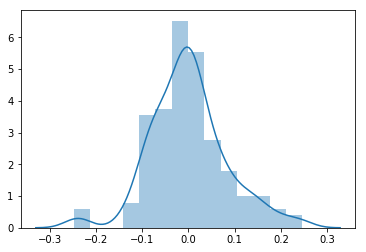

In [3660]:
res = y_train - y_train_pred
sns.distplot(res)

## from residual analysis it seems all data point very close to 0 and its mean to 0 too with in centered.

## Step 4 : Prediction and Evaluation on the Test set

In [3661]:
# Create list of numeric variable
num_vars = ['drivewheel','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

#2. Fit the data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
160,0,1,0,0,0.5,0,0.313793,0.409756,0.341667,0.460177,...,0,0,0,0,0,1,0,0,0,0
186,2,1,0,0,0.5,0,0.368966,0.497561,0.433333,0.699115,...,0,0,0,0,0,0,0,1,0,0
59,1,1,0,1,0.5,0,0.420690,0.596748,0.516667,0.522124,...,0,0,0,0,0,0,0,0,0,0
165,1,1,0,1,1.0,0,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,1,0,0,0,0
140,2,1,0,1,0.0,0,0.231034,0.263415,0.291667,0.699115,...,0,0,0,0,1,0,0,0,0,0


In [3662]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
mean,0.919355,0.887097,0.177419,0.435484,0.701613,0.032258,0.437764,0.559481,0.480376,0.559663,...,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.016129,0.064516,0.080645,0.0
std,1.358620,0.319058,0.385142,0.499868,0.263328,0.178127,0.212861,0.189947,0.165440,0.215811,...,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.127000,0.247676,0.274512,0.0
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.313793,0.459350,0.358333,0.384956,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.387931,0.547967,0.441667,0.588496,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.570690,0.719919,0.516667,0.699115,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [3663]:
y_test = df_test.pop('price')
X_test = df_test

In [3664]:
# add a constant
X_test_sm = sm.add_constant(X_test)
X_test.head()
X_test_sm.shape


(62, 56)

In [3665]:
X_test_sm = X_test_sm.drop(['subaru','ohcf','enginelocation','mercury','citympg','citympg','vokswagen','cylindernumber','carlength','horsepower','wheelbase','stroke','sedan','highwaympg','drivewheel','ohc','fuelsystem','doornumber','symboling','vw','wagon','volswagen','mazda','toyota','chevrolet','audi','nissan','isuzu','dohcv','aspiration','ohcv','honda','plymouth','dodge','renault','curbweight','fueltype','carwidth','boreratio','peugeot','alfa-romero','saab','jaguar','buick','l','porsche','mitsubishi','hardtop','volvo','hatchback'],axis=1)


In [3666]:
#predict 
y_test_pred = lr_model.predict(X_test_sm)

## R2 score.

In [3667]:
r2_score(y_true = y_test, y_pred =y_test_pred)

0.8334693419004748

Text(0, 0.5, 'y_test_pred')

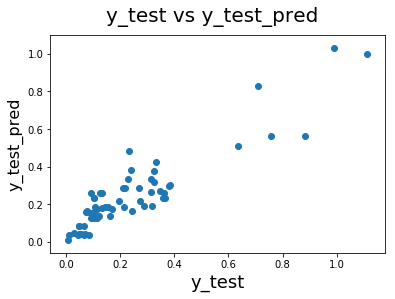

In [3668]:
# Plotting graph

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred',fontsize = 20)
plt.xlabel('y_test',fontsize =18)
plt.ylabel('y_test_pred',fontsize =16)

## So our equestion of best fitted line is

### price = 0.1129 * carheight + 1.2406 * enginesize + 0.1075 * compressionratio + 0.2883 * peakrpm + 0.2389 * rotor + 0.2029 * bmw  - 0.2463

### Now VIF process also bit lebgth where you need to select variable manyally and its a combersion process.
#### We need to approach a automate selection process
#### In aumatic selection process which is RFE its all depends upon who may featire you are selecting


In [3669]:
df.head()


,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
0,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,2,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,1,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,0,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [3670]:
## Spliting data into train and test
df_train,df_test = train_test_split(df,train_size = 0.7,test_size = 0.3,random_state =100)
df_train.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
122,1,1,0,0,1,0,93.7,167.3,63.8,50.8,...,1,0,0,0,0,0,0,0,0,0
125,3,1,0,1,2,0,94.5,168.9,68.3,50.2,...,0,1,0,0,0,0,0,0,0,0
166,1,1,0,1,2,0,94.5,168.7,64.0,52.6,...,0,0,0,0,0,1,0,0,0,0
1,3,1,0,1,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,1,0,2,0,104.3,188.8,67.2,57.5,...,0,0,0,0,0,0,0,0,1,0


In [3671]:
scaler = MinMaxScaler()

# Create list of numeric variable
num_vars = ['drivewheel','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
#2. Fit the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
122,1,1,0,0,0.5,0,0.244828,0.426016,0.291667,0.265487,...,1,0,0,0,0,0,0,0,0,0
125,3,1,0,1,1.0,0,0.272414,0.452033,0.666667,0.212389,...,0,1,0,0,0,0,0,0,0,0
166,1,1,0,1,1.0,0,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,1,0,0,0,0
1,3,1,0,1,1.0,0,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,1,0,1.0,0,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,0,1,0


In [3672]:
# X_train, y_train
y_train = df_train.pop('price')
X_train = df_train

## RFE (Recursive feature elimination)

In [3673]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [3674]:
# Running RFE with output number of the variables

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,20)
rfe = rfe.fit(X_train,y_train)



In [3675]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 36),
 ('fueltype', True, 1),
 ('aspiration', False, 11),
 ('doornumber', False, 32),
 ('drivewheel', False, 30),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('fuelsystem', False, 17),
 ('boreratio', False, 3),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 27),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 16),
 ('hardtop', False, 7),
 ('hatchback', False, 4),
 ('sedan', False, 6),
 ('wagon', False, 5),
 ('dohcv', False, 18),
 ('l', True, 1),
 ('ohc', False, 10),
 ('ohcf', True, 1),
 ('ohcv', False, 23),
 ('rotor', True, 1),
 ('alfa-romero', True, 1),
 ('audi', False, 21),
 ('bmw', True, 1),
 ('buick', False, 29),
 ('chevrolet', False, 12),
 ('dodge', False, 13),
 ('honda', False, 15),
 ('isuzu', False, 31),
 ('jaguar', False, 19),
 ('mazda', Fal

In [3676]:
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'cylindernumber', 'enginesize', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'l', 'ohcf', 'rotor',
       'alfa-romero', 'bmw', 'peugeot', 'saab', 'subaru'],
      dtype='object')

In [3677]:
X_train.columns[~rfe.support_]


Index(['symboling', 'aspiration', 'doornumber', 'drivewheel', 'carheight',
       'fuelsystem', 'boreratio', 'horsepower', 'highwaympg', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'ohc', 'ohcv', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'plymouth', 'porsche', 'renault', 'toyota',
       'vokswagen', 'volswagen', 'volvo', 'vw'],
      dtype='object')

## Building model using statsmodel

In [3678]:
# Creating X_train data frame with RFE selected variable

X_train_rfe = X_train[col]

In [3679]:
# Adding constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)

In [3680]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [3681]:
# Lest see the summary of our first model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     109.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.17e-67
Time:                        13:11:15   Log-Likelihood:                 223.41
No. Observations:                 143   AIC:                            -406.8
Df Residuals:                     123   BIC:                            -347.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1341      0.164  

In [3682]:
X_train_new = X_train_rfe.drop(['compressionratio'],axis =1)


In [3683]:
# Adding a constant variable and re building the model
X_train_lm = sm.add_constant(X_train_new)

In [3684]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [3685]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     114.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.91e-68
Time:                        13:11:15   Log-Likelihood:                 221.90
No. Observations:                 143   AIC:                            -405.8
Df Residuals:                     124   BIC:                            -349.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0997      0.077     -1.

In [3686]:
X_train_new = X_train_new.drop(['citympg'],axis =1)

In [3687]:
X_train_new.head()

,const,fueltype,enginelocation,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,stroke,peakrpm,l,ohcf,rotor,alfa-romero,bmw,peugeot,saab,subaru
122,1.0,1,0,0.244828,0.426016,0.291667,0.272692,0.333333,0.139623,0.525253,0.551020,0,0,0,0,0,0,0,0
125,1.0,1,0,0.272414,0.452033,0.666667,0.500388,0.333333,0.339623,0.464646,0.551020,0,0,0,0,0,0,0,0
166,1.0,1,0,0.272414,0.448780,0.308333,0.314973,0.333333,0.139623,0.449495,1.000000,0,0,0,0,0,0,0,0
1,1.0,1,0,0.068966,0.450407,0.316667,0.411171,0.333333,0.260377,0.247475,0.346939,0,0,0,1,0,0,0,0
199,1.0,1,0,0.610345,0.775610,0.575000,0.647401,0.333333,0.260377,0.484848,0.387755,0,0,0,0,0,0,0,0


In [3688]:
# Adding a constant variable and re building the model
X_train_new = sm.add_constant(X_train_new)

In [3689]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3690]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     120.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.82e-69
Time:                        13:11:15   Log-Likelihood:                 220.97
No. Observations:                 143   AIC:                            -405.9
Df Residuals:                     125   BIC:                            -352.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0179      0.043     -0.

In [3691]:
X_train_new = X_train_new.drop(['saab'],axis =1)

In [3692]:
X_train_new.head()

,const,fueltype,enginelocation,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,stroke,peakrpm,l,ohcf,rotor,alfa-romero,bmw,peugeot,subaru
122,1.0,1,0,0.244828,0.426016,0.291667,0.272692,0.333333,0.139623,0.525253,0.551020,0,0,0,0,0,0,0
125,1.0,1,0,0.272414,0.452033,0.666667,0.500388,0.333333,0.339623,0.464646,0.551020,0,0,0,0,0,0,0
166,1.0,1,0,0.272414,0.448780,0.308333,0.314973,0.333333,0.139623,0.449495,1.000000,0,0,0,0,0,0,0
1,1.0,1,0,0.068966,0.450407,0.316667,0.411171,0.333333,0.260377,0.247475,0.346939,0,0,0,1,0,0,0
199,1.0,1,0,0.610345,0.775610,0.575000,0.647401,0.333333,0.260377,0.484848,0.387755,0,0,0,0,0,0,0


In [3693]:
# Adding a constant variable and re building the model
X_train_new = sm.add_constant(X_train_new)

In [3694]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3695]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     124.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.24e-69
Time:                        13:11:15   Log-Likelihood:                 218.63
No. Observations:                 143   AIC:                            -403.3
Df Residuals:                     126   BIC:                            -352.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0164      0.044     -0.

In [3696]:
X_train_new = X_train_new.drop(['alfa-romero'],axis =1)

In [3697]:
# Adding a constant variable and re building the model
X_train_new = sm.add_constant(X_train_new)

In [3698]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3699]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     126.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.07e-68
Time:                        13:11:15   Log-Likelihood:                 215.02
No. Observations:                 143   AIC:                            -398.0
Df Residuals:                     127   BIC:                            -350.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0061      0.044      0.

In [3700]:
X_train_new = X_train_new.drop(['wheelbase'],axis =1)

In [3701]:
# Adding a constant variable and re building the model
X_train_new = sm.add_constant(X_train_new)

In [3702]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3703]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     134.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.00e-69
Time:                        13:11:16   Log-Likelihood:                 213.66
No. Observations:                 143   AIC:                            -397.3
Df Residuals:                     128   BIC:                            -352.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.044      0.

In [3704]:
X_train_new = X_train_new.drop(['carlength'],axis =1)

In [3705]:
# Adding a constant variable and re building the model
X_train_new = sm.add_constant(X_train_new)

In [3706]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3707]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     139.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.35e-69
Time:                        13:11:16   Log-Likelihood:                 210.74
No. Observations:                 143   AIC:                            -393.5
Df Residuals:                     129   BIC:                            -352.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0018      0.045      0.

In [3708]:
X_train_new = X_train_new.drop(['l'],axis =1)

In [3709]:
# Adding a constant variable and re building the model
X_train_new = sm.add_constant(X_train_new)

In [3710]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3711]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     132.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.51e-67
Time:                        13:11:16   Log-Likelihood:                 201.81
No. Observations:                 143   AIC:                            -377.6
Df Residuals:                     130   BIC:                            -339.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0027      0.047     -0.

In [3712]:
X_train_new = X_train_new.drop(['cylindernumber'],axis =1)

In [3713]:
# Adding a constant variable and re building the model
X_train_new = sm.add_constant(X_train_new)

In [3714]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3715]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.13e-66
Time:                        13:11:16   Log-Likelihood:                 197.62
No. Observations:                 143   AIC:                            -371.2
Df Residuals:                     131   BIC:                            -335.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0778      0.040     -1.

In [3716]:
X_train_new = X_train_new.drop(['rotor'],axis =1)

In [3717]:
# Adding a constant variable and re building the model
X_train_new = sm.add_constant(X_train_new)

In [3718]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3719]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     144.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.96e-66
Time:                        13:11:16   Log-Likelihood:                 194.15
No. Observations:                 143   AIC:                            -366.3
Df Residuals:                     132   BIC:                            -333.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0882      0.040     -2.

In [3720]:
X_train_new = X_train_new.drop(['fueltype'],axis =1)

In [3721]:
# Adding a constant variable and re building the model
X_train_new = sm.add_constant(X_train_new)

In [3722]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3723]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     150.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.15e-65
Time:                        13:11:16   Log-Likelihood:                 189.57
No. Observations:                 143   AIC:                            -359.1
Df Residuals:                     133   BIC:                            -329.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1592      0.033     -4.

In [3724]:
X_train_new = X_train_new.drop(['peakrpm'],axis =1)

In [3725]:
# Adding a constant variable and re building the model
X_train_new = sm.add_constant(X_train_new)

In [3726]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3727]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     165.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.42e-65
Time:                        13:11:16   Log-Likelihood:                 187.64
No. Observations:                 143   AIC:                            -357.3
Df Residuals:                     134   BIC:                            -330.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1242      0.028     -4.

In [3728]:
X_train_new = X_train_new.drop(['stroke'],axis =1)

In [3729]:
# Adding a constant variable and re building the model
X_train_new = sm.add_constant(X_train_new)

In [3730]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3731]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     178.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.12e-65
Time:                        13:11:16   Log-Likelihood:                 183.44
No. Observations:                 143   AIC:                            -350.9
Df Residuals:                     135   BIC:                            -327.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1900      0.017    -11.

In [3732]:
X_train_new = X_train_new.drop(['peugeot'],axis =1)

In [3733]:
# Adding a constant variable and re building the model
X_train_new = sm.add_constant(X_train_new)

In [3734]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3735]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.55e-62
Time:                        13:11:16   Log-Likelihood:                 173.67
No. Observations:                 143   AIC:                            -333.3
Df Residuals:                     136   BIC:                            -312.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1765      0.017    -10.

## This is our final model which will be input to test data

### price = 0.3289 * enginelocation + 0.3591 * carwidth + 0.2719 * curbweight + 0.4480 * enginesize + 0.1471 * ohcf +  0.2468 * bmw - 0.1818 * subaru  - 0.2463

## Residual Ananaysis

In [3736]:
#y_train_price = lm.predict(X_train_)
y_train_pred = lm.predict(X_train_new)
y_train_pred.head()


122    0.064916
125    0.351097
166    0.082398
1      0.165645
199    0.322653
dtype: float64

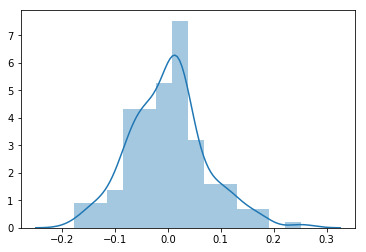

In [3737]:
res = y_train - y_train_pred
sns.distplot(res)

## from residual analysis it seems all data point very close to 0 and its mean to 0 too with in centered.

## Making Prediction

In [3738]:
# Creating X test new data frame after dropping variable from X
# Create list of numeric variable

num_vars = ['drivewheel','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

#2. Fit the data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()




,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volswagen,volvo,vw
160,0,1,0,0,0.5,0,0.313793,0.409756,0.341667,0.460177,...,0,0,0,0,0,1,0,0,0,0
186,2,1,0,0,0.5,0,0.368966,0.497561,0.433333,0.699115,...,0,0,0,0,0,0,0,1,0,0
59,1,1,0,1,0.5,0,0.420690,0.596748,0.516667,0.522124,...,0,0,0,0,0,0,0,0,0,0
165,1,1,0,1,1.0,0,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,1,0,0,0,0
140,2,1,0,1,0.0,0,0.231034,0.263415,0.291667,0.699115,...,0,0,0,0,1,0,0,0,0,0


In [3739]:
y_test = df_test.pop('price')
X_test = df_test

In [3740]:
# Now lets use our model to make prediction

# add a constant
X_test_new = sm.add_constant(X_test)
X_test_new.head()

X_test_new.columns

Index(['const', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'alfa-romero', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'vokswagen',
       'volswagen', 'volvo', 'vw'],
      dtype='object')

In [3741]:
#X_test_new = X_test_new.drop(['isuzu','mazda','highwaympg','horsepower','audi','chevrolet','doornumber','vw','subaru','stroke','wheelbase','toyota','cylindernumber','nissan','citympg','peugeot','fuelsystem','carlength','alfa-romero','fueltype','compressionratio','curbweight','boreratio','dodge','saab','plymouth','carheight','drivewheel','mercury','vokswagen'],axis =1)
#X_test_new.shape
X_test_new = X_test_new.drop(['symboling', 'fueltype', 'aspiration', 'doornumber','drivewheel' ,'wheelbase', 'carlength','carheight', 'cylindernumber', 'fuelsystem','boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm','citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon','dohcv', 'l', 'ohc','ohcv', 'rotor', 'alfa-romero', 'audi','buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar','mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth','porsche', 'renault', 'saab',  'toyota', 'vokswagen','volswagen', 'volvo', 'vw'],axis =1)
X_test_new.shape

(62, 8)

In [3742]:
X_test_new.columns

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'ohcf', 'bmw', 'subaru'],
      dtype='object')

In [3743]:
#predict 
y_pred = lm.predict(X_test_new)


## R2 value

In [3744]:
r2_score(y_true = y_test, y_pred =y_pred)

0.8858483633336358

Text(0, 0.5, 'y_pred')

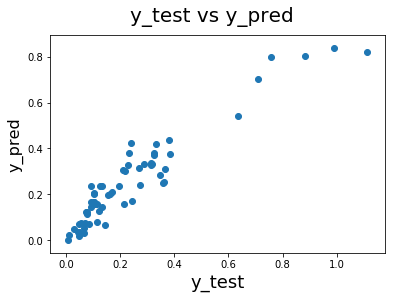

In [3745]:
# Plotting graph

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize = 20)
plt.xlabel('y_test',fontsize =18)
plt.ylabel('y_pred',fontsize =16)

## Interpet from above Graph:

1. Looks like in RFE process price is increasing with all dependet variable what we have choosen.
2. If you see X and Y, Y_test_pred is directly propersional to y_test which is all individual data point and its postive correlation.
3. RfE selection process result almost similar with VIF and all cofficient.
4. We can choose any selection method its all depends upon how many independent or predictor varaible we have.
5. Recomminadtion is we need to go for both automatc selection and manually with some data point and variable and make the prediction.

So equation of best fitted lin will be:
price = 0.3289  * enginelocation + 0.3591 * carwidth + 0.2719  * curbweight +   0.1471 * ohcf +  0.2468 * bmw + 0.4480  * enginesize -  0.1818 * subaru - 0.1765 

### Prediction:

    1. If any changes in any independent variable held other independent varable constant then price must goes up.
    2. if any changes in subaru pice must go down with unit * 0.1818
    3. If any changes in any dependent variable apart from subaru price should goes up with multiplication of that unit.
    4. Looks like enginesize is top most  highly correlated with price.
    5. r2 and adjusted r2 is related to each other and it is around 88%.
    6. All p value nearly 0 so indicate all independent variable is mightcoorelated with price.
    7. Prob (F-statistic) is almost zero so it also indicating all those variable are significant.
    8. From resudial analysis, all values ar near to zero and all mean, median, mode in centred.
    

### Recommendation to Chinese automobile company Geely:

1. They should start making bmw car.
2. They should think about subaru brand.
3. while manufacturing, they think take into consideration,enginesize,carwidth, enginelocation etc as per model.
4. There is a negative constant factor so if they dont manufatcture then their respecive car price will be down 0.1765 as per time.
5. They should have high visiability of enginesize,carwidth, enginelocation in product and should not negociate anything.